# Visualizing Supervised Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
plt.xkcd()

In [4]:
# if this is true, all images are saved to disk
global_print_flag = True

In [5]:
!mkdir tmp_figures

A subdirectory or file tmp_figures already exists.


In [6]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26935  100 26935    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k


In [7]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [8]:
df.head()

max speed   age  thousand km per year  group
0      148.0  44.0                  25.0      1
1      168.0  54.0                  24.0      1
2      161.0  26.0                  34.0      0
3      137.0  25.0                  10.0      2
4      164.0  38.0                  22.0      1

In [9]:
df.describe()

max speed          age  thousand km per year        group
count  1500.000000  1500.000000           1500.000000  1500.000000
mean    171.386000    44.969333             30.511333     0.998667
std      19.269126    16.935040             15.112317     0.816768
min     118.000000    18.000000              5.000000     0.000000
25%     158.000000    32.000000             18.000000     0.000000
50%     170.000000    42.000000             29.000000     1.000000
75%     187.000000    55.000000             42.000000     2.000000
max     216.000000    90.000000             84.000000     2.000000

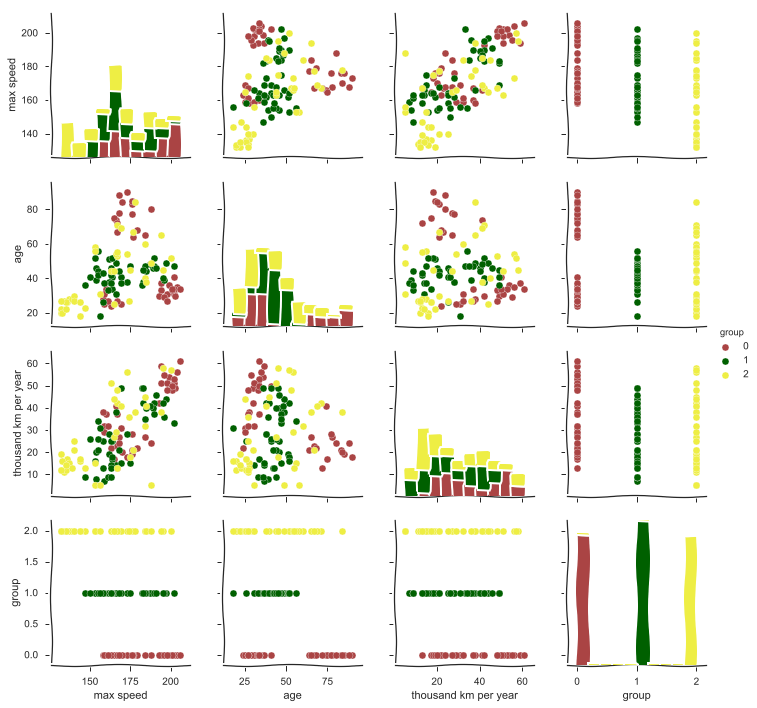

In [10]:
import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=120, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [11]:
y=df['group']

In [12]:
df.drop('group', axis='columns', inplace=True)

In [13]:
X = df.as_matrix()

## We restrict ourselves to two dimensions for now

In [14]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)

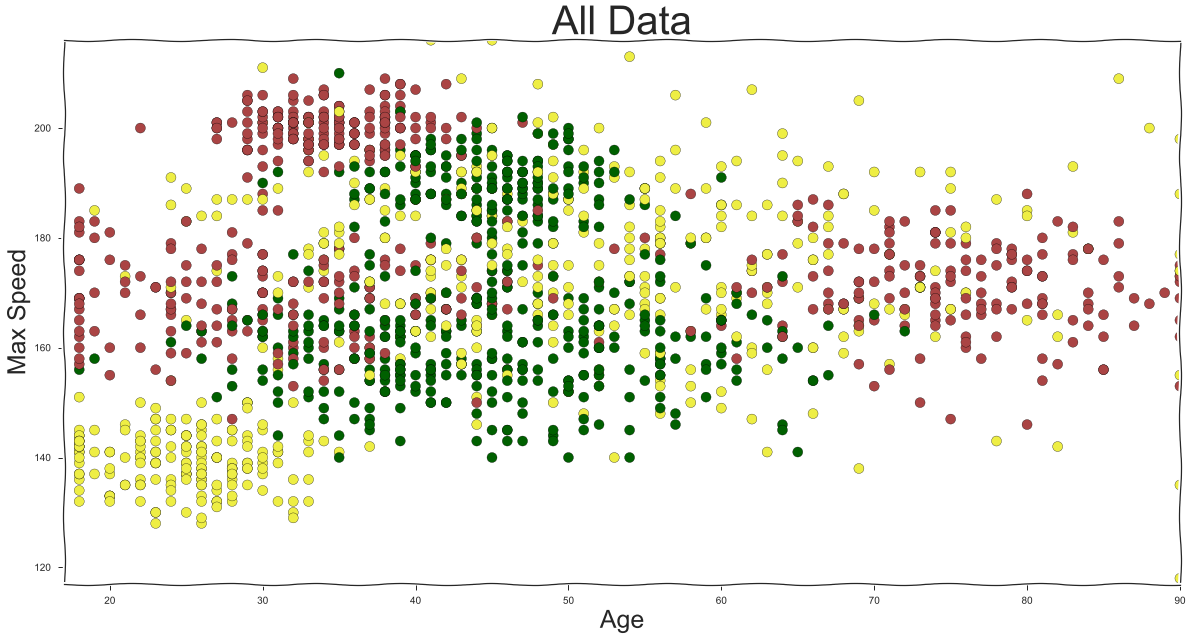

In [15]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data",
                fname='all.png')

## We provide a few hand built classifiers as base lines

In [16]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [17]:
random_clf = RandomClassifier()

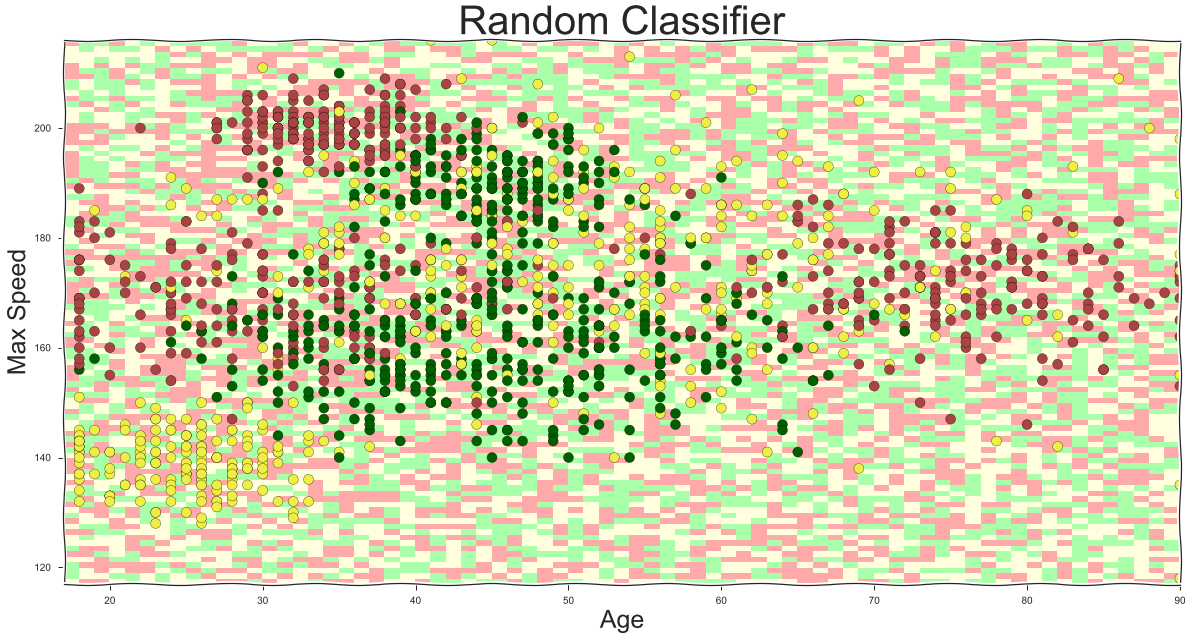

In [18]:
plotPrediction(random_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Random Classifier",
                fname='random.png')

In [19]:
random_clf.score(X, y)

0.32133333333333336

In [20]:
class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [21]:
base_clf = BaseLineClassifier()

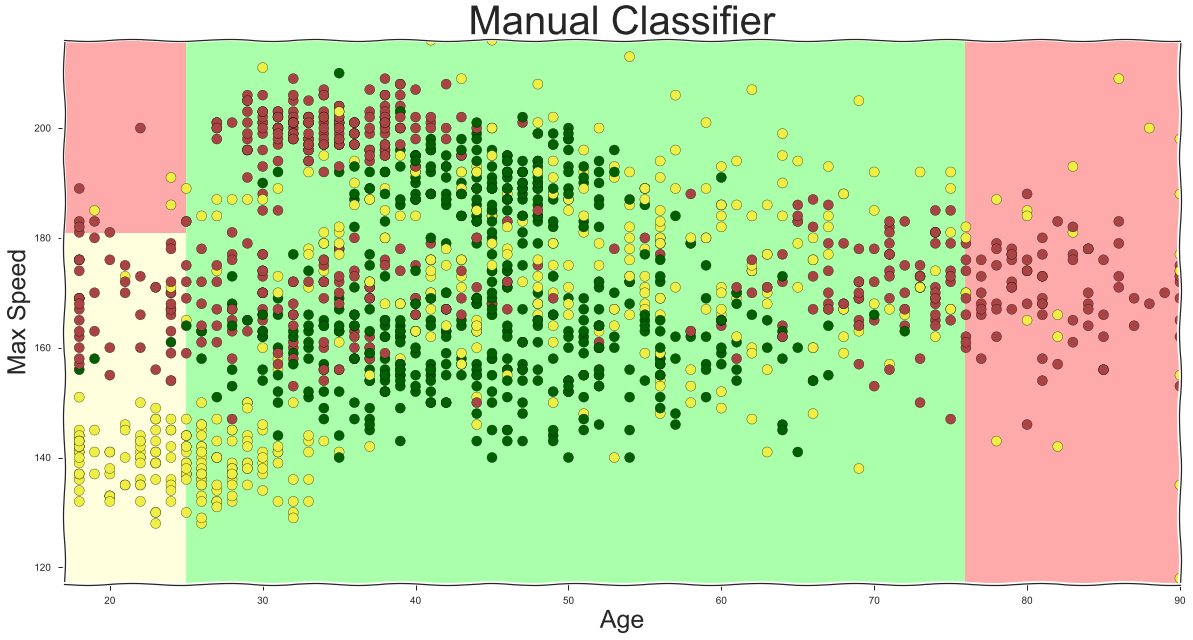

In [22]:
plotPrediction(base_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Manual Classifier",
                fname='prog.png')

In [23]:
base_clf.score(X, y)

0.454

## Second important concept: To have an idea how well the training worked, we save same data to try our model on previously unseen data. How well it performs on this test data as opposed to the training data tells us quite a bit as well.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64), array([301, 300, 299], dtype=int64))

In [28]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2], dtype=int64), array([200, 200, 200], dtype=int64))

In [29]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

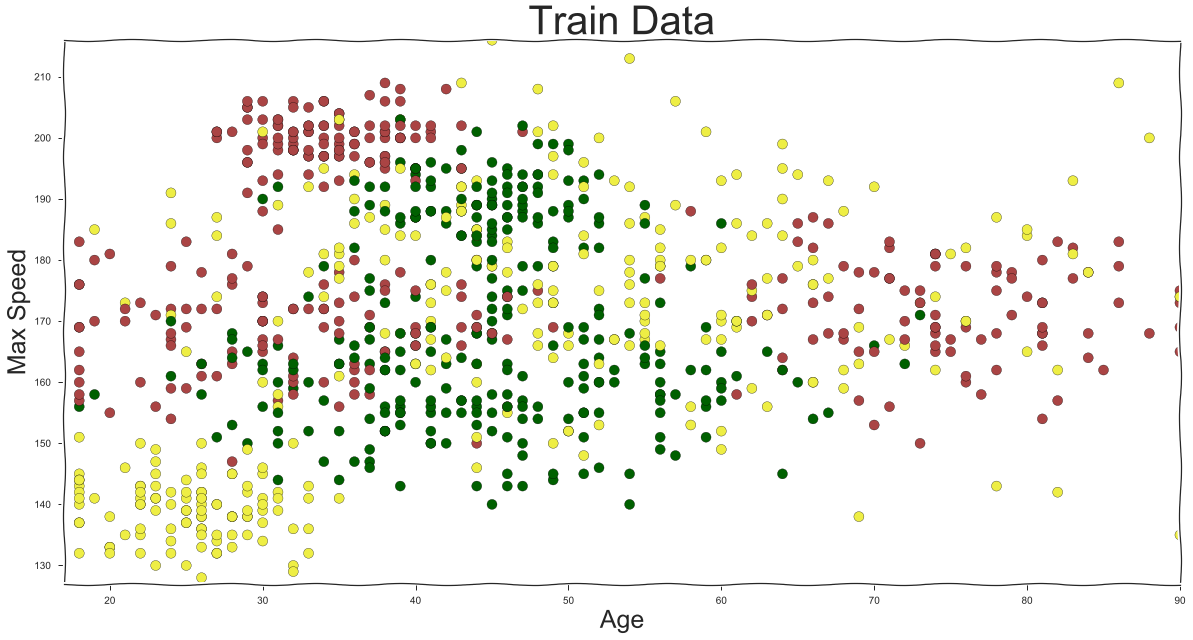

In [30]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data",
                fname='train.png')

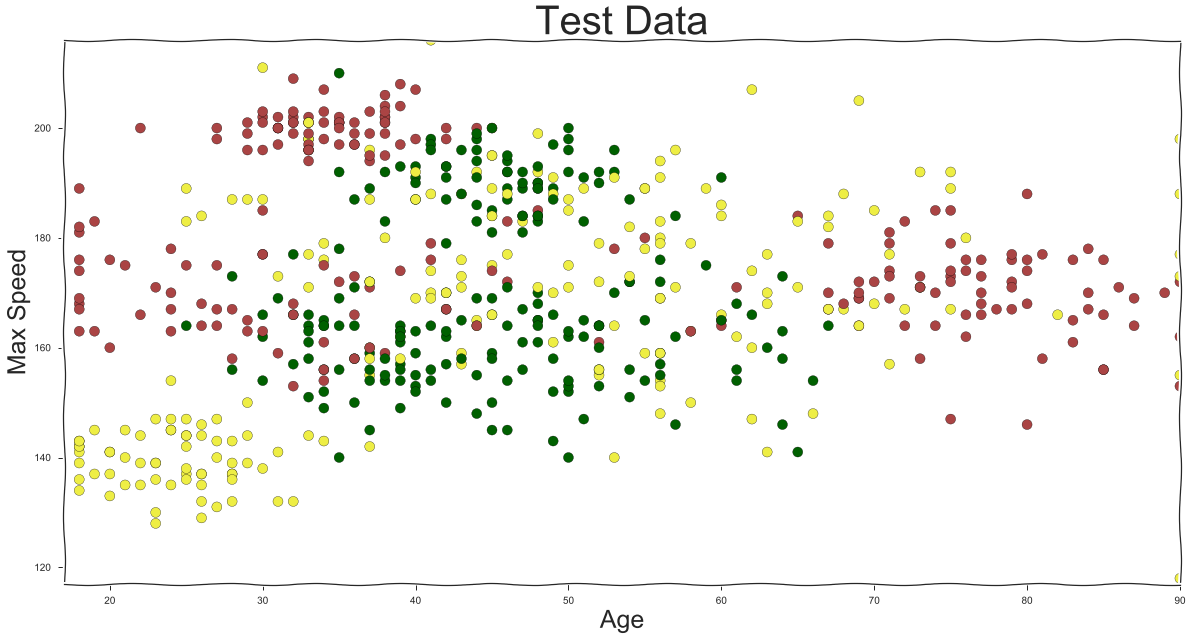

In [31]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data",
                fname='test.png')

## KNN - Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(1)

In [33]:
%time clf.fit(X_train_2_dim, y_train)

Wall time: 4 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

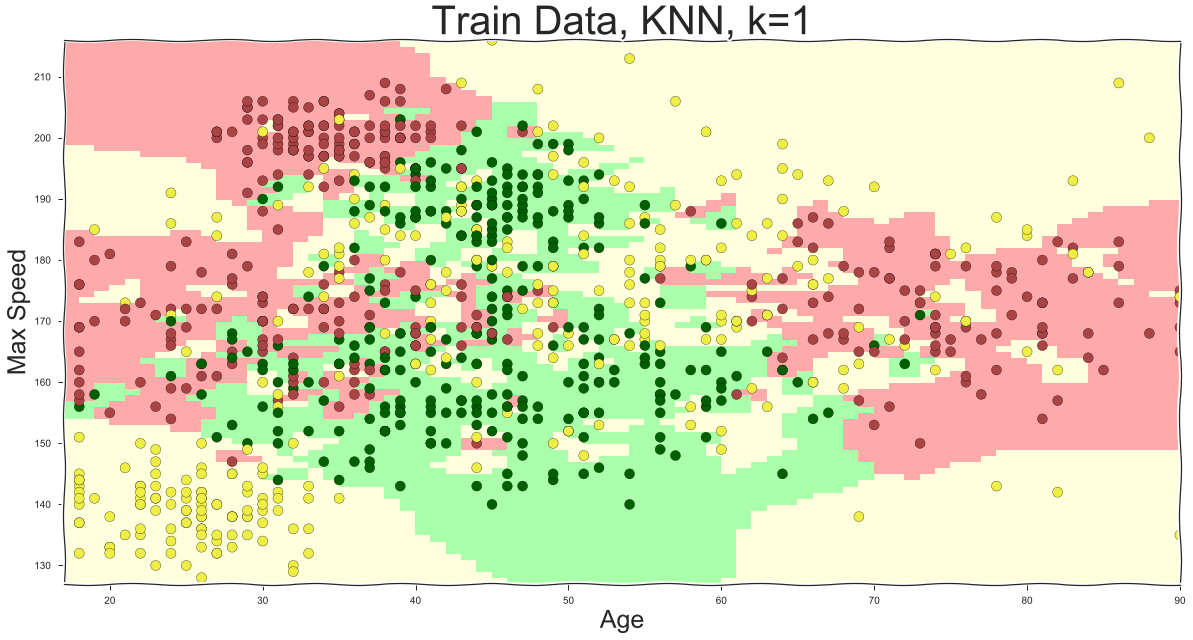

In [34]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=1",
                fname='knn1-train.png')

In [35]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

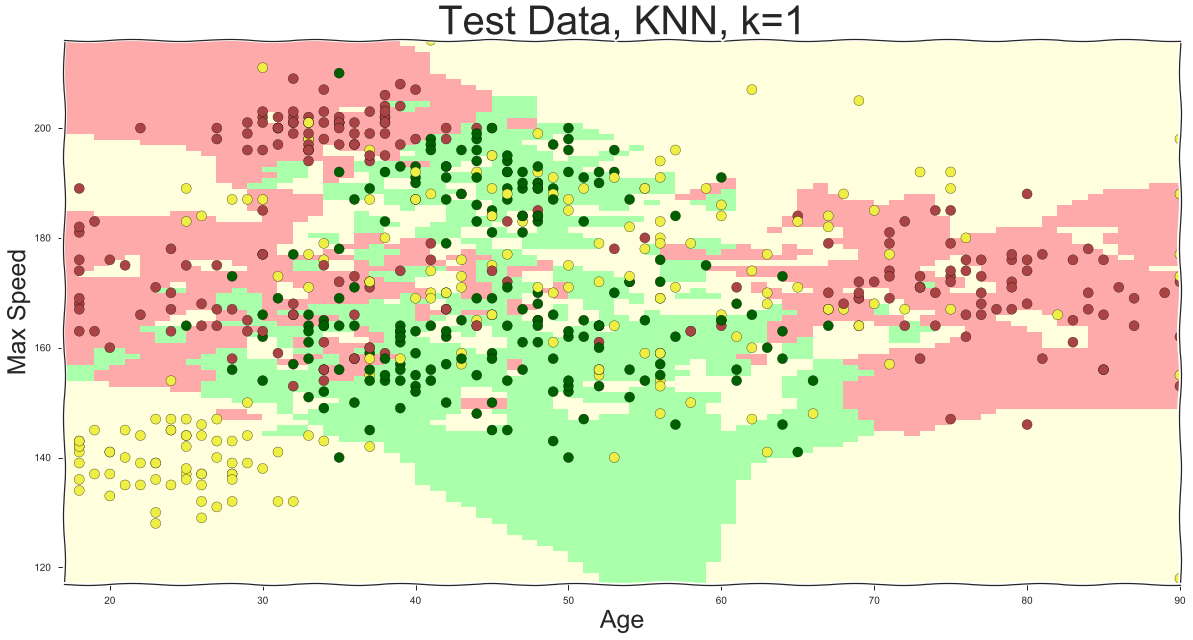

In [36]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=1",
                fname='knn1-test.png')

In [37]:
clf.score(X_test_2_dim, y_test)

0.6366666666666667

In [38]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [39]:
# cross_val_score?

In [40]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.61129568, 0.66666667, 0.65217391])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.05)


## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided.

### In KNN we reduce overfitting by taking more neighbors into account

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance']
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 7.55 s


{'n_neighbors': 23, 'weights': 'uniform'}

In [43]:
clf = KNeighborsClassifier(n_neighbors=23, weights='uniform')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1.09 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

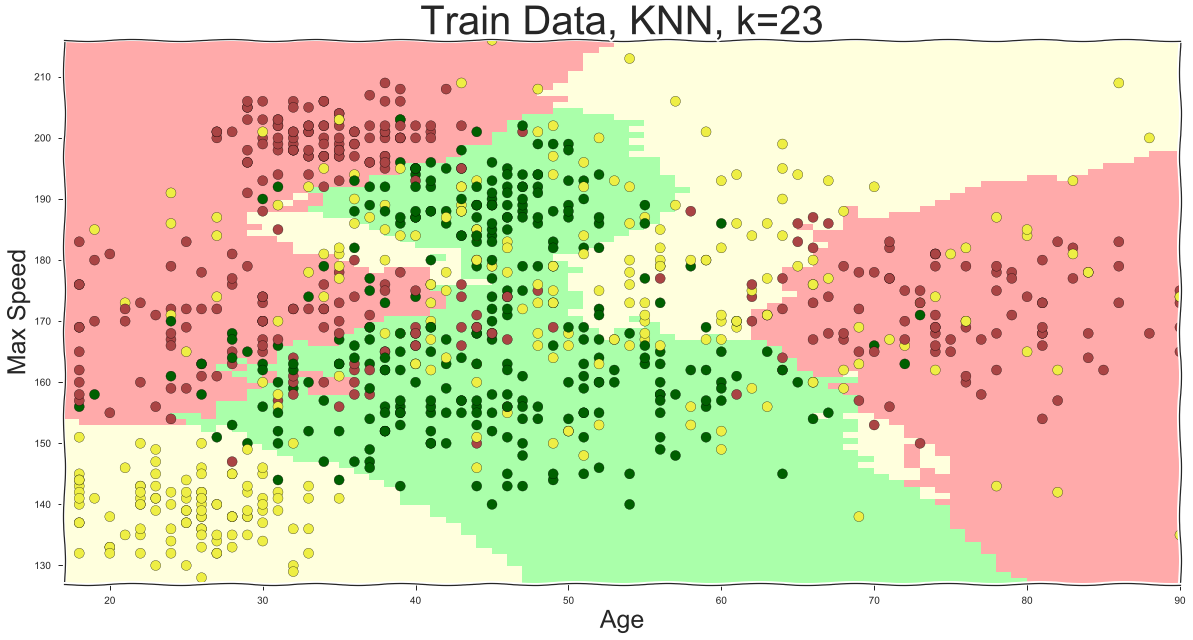

In [44]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=23",
                fname='knn23-train.png')

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [45]:
clf.score(X_train_2_dim, y_train)

0.7322222222222222

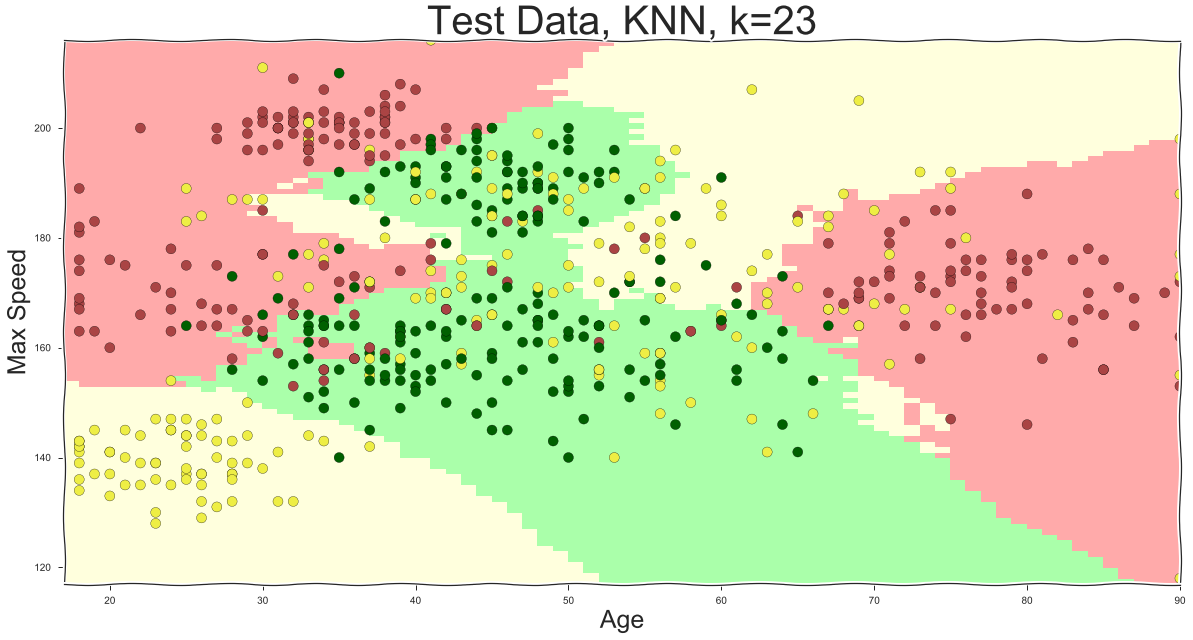

In [46]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=23",
                fname='knn23-test.png')

In [47]:
clf.score(X_test_2_dim, y_test)

0.7216666666666667

In [48]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.68106312, 0.74666667, 0.69565217])

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.06)


## Descision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
clf.tree_.max_depth

20

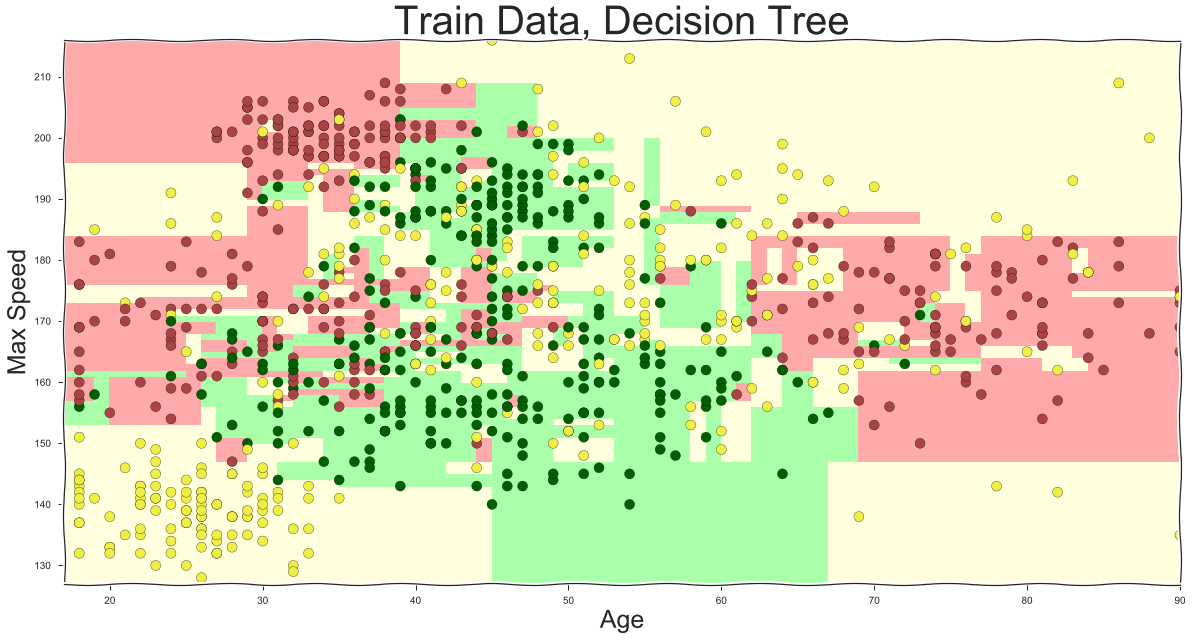

In [52]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree",
                fname='dt-overfit-train.png')

In [53]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

In [54]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.56810631, 0.61333333, 0.63210702])

In [55]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.05)


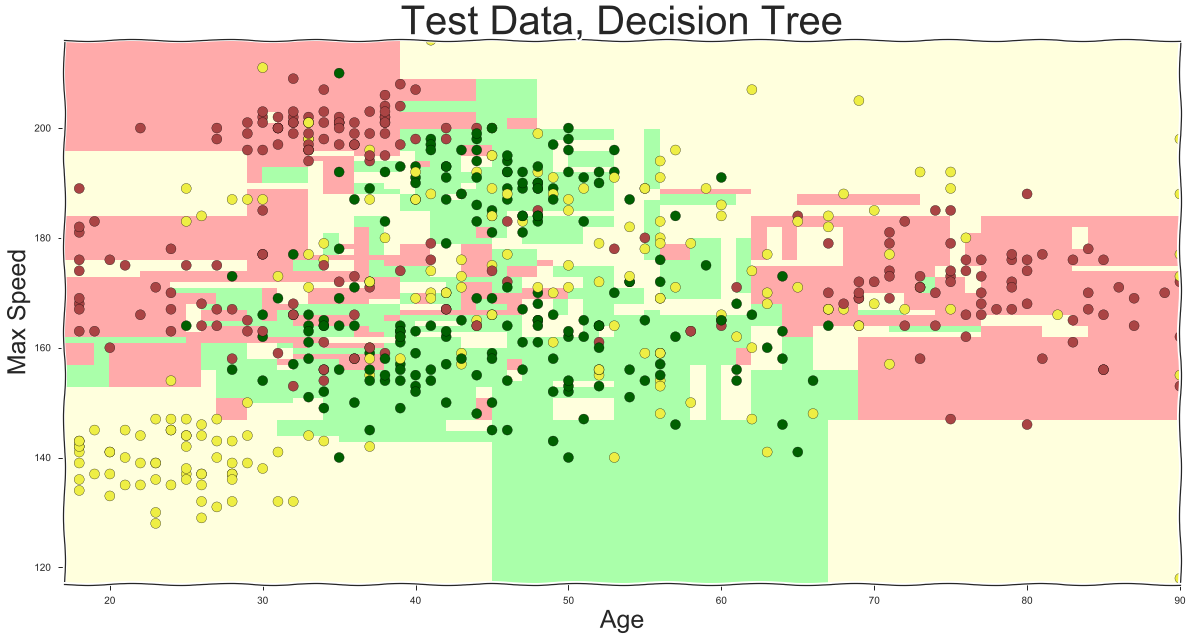

In [56]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree",
                fname='dt-overfit-test.png')

In [57]:
clf.score(X_test_2_dim, y_test)

0.6116666666666667

In [58]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 9.23 s


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}

In [59]:
clf = DecisionTreeClassifier(max_depth=7,
                              min_samples_leaf=4,
                              min_samples_split=19)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1.98 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
clf.tree_.max_depth

7

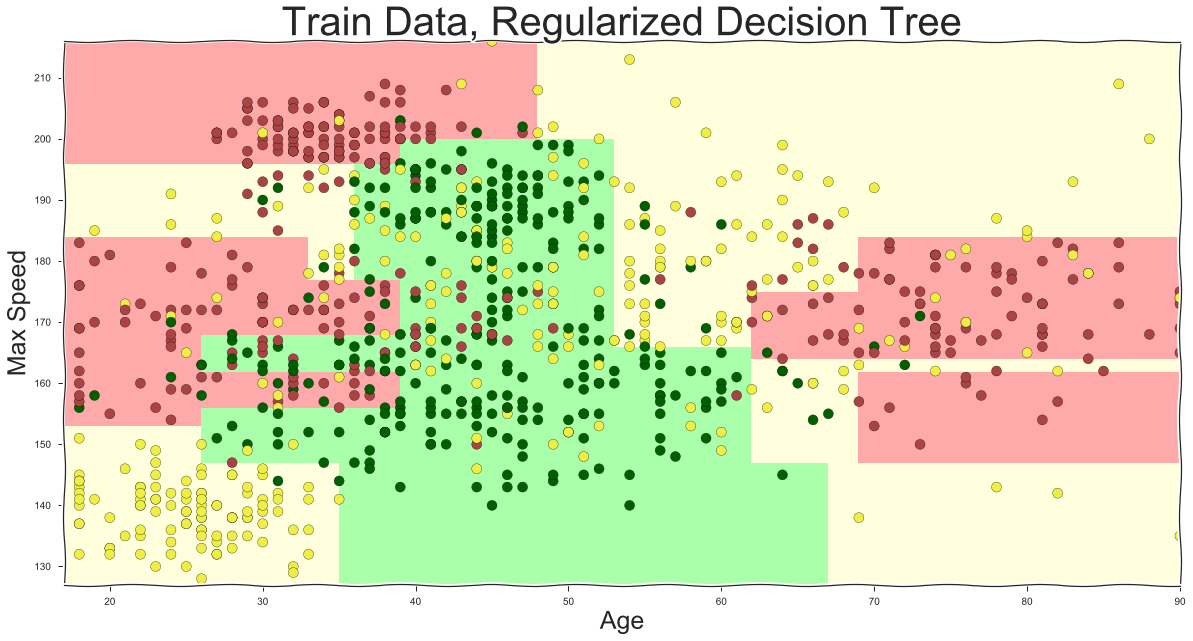

In [61]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree",
                fname='dt-sweet-train.png')

In [62]:
clf.score(X_train_2_dim, y_train)

0.7677777777777778

In [63]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.69435216, 0.73333333, 0.68227425])

In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.04)


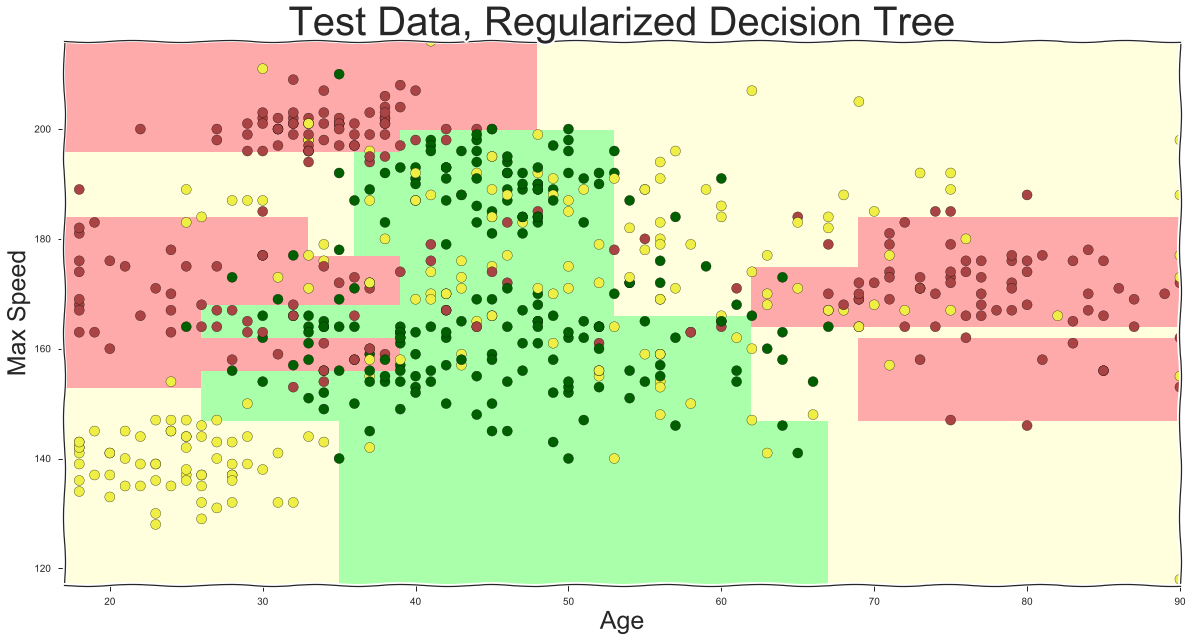

In [65]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree",
                fname='dt-sweet-test.png')

In [66]:
clf.score(X_test_2_dim, y_test)

0.7

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 112 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
clf.score(X_train_2_dim, y_train)

0.9377777777777778

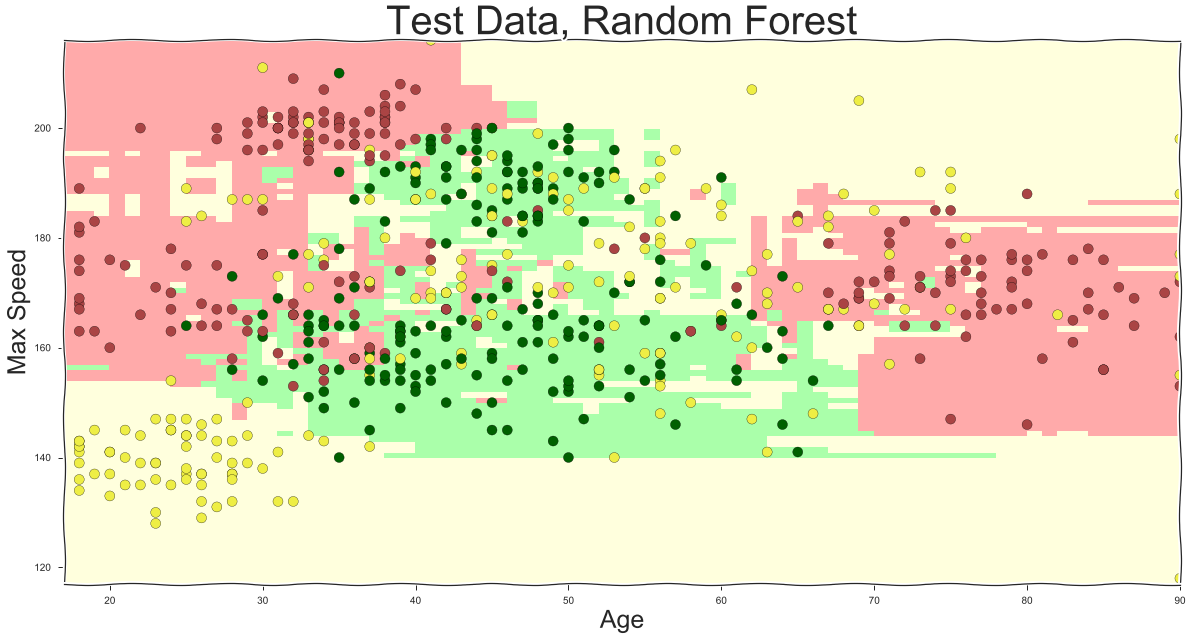

In [69]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Random Forest",
                fname='rf-overfit-train.png')

In [70]:
clf.score(X_test_2_dim, y_test)

0.6583333333333333

In [71]:
# brute force grid search is far too expensive

param_grid = {
    'n_estimators': list(range(3,20)),
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
# %time clf.fit(X_train_2_dim, y_train)
# clf.best_params_

In [72]:
# http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(3,20),
    "max_depth": randint(2, 25),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

clf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=1000, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 19.4 s


{'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 19}

In [73]:
# parameters might vary a bit with each run, because it is a random search
clf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=17, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 117 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
clf.score(X_train_2_dim, y_train)

0.7544444444444445

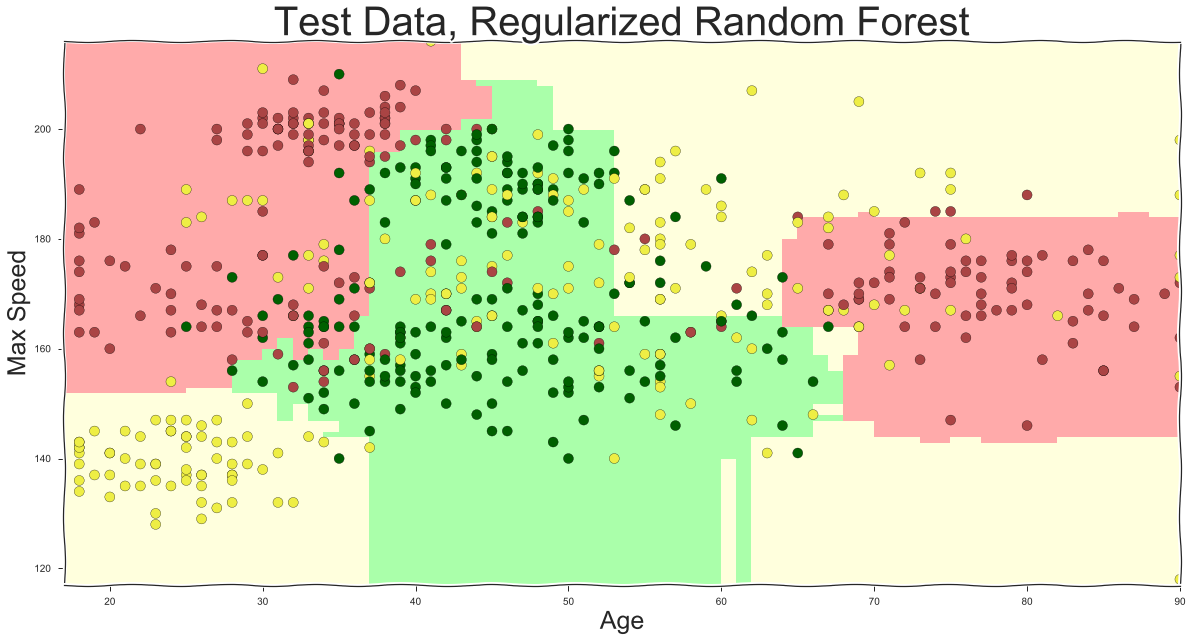

In [75]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Random Forest",
                fname='rf-sweet-test.png')

In [76]:
clf.score(X_test_2_dim, y_test)

0.71

## Support Vector Machines (SVM)

In [77]:
from sklearn.svm import SVC
clf = SVC()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 39 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
clf.score(X_train_2_dim, y_train)

0.9166666666666666

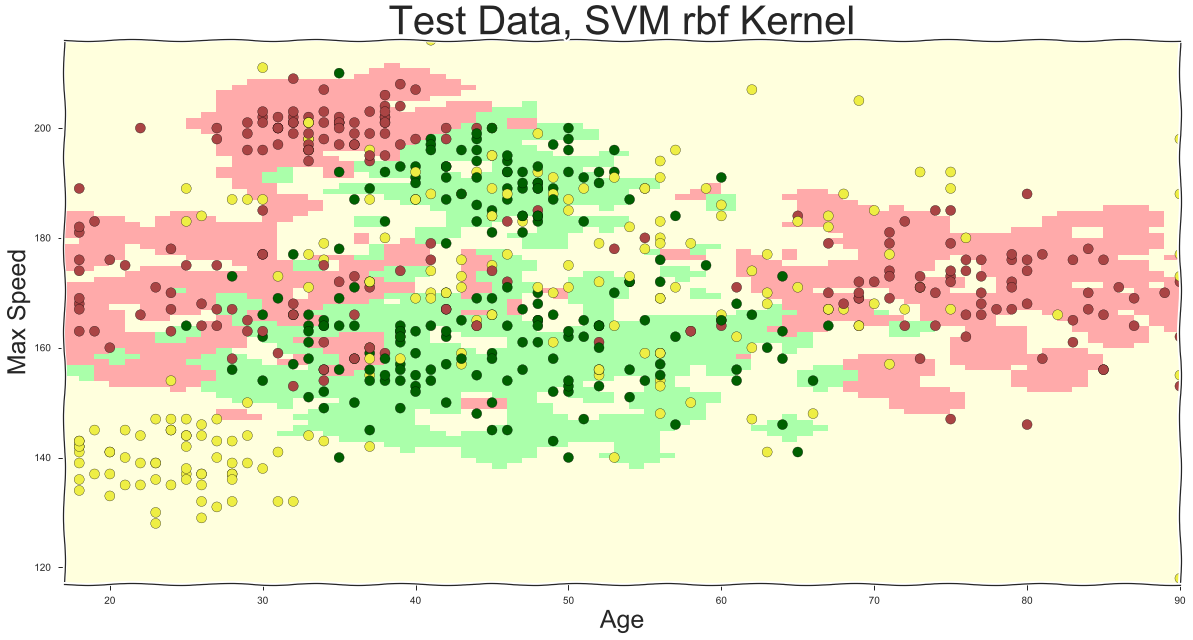

In [79]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM rbf Kernel",
                fname='svm-overfit-test.png')

In [80]:
clf.score(X_test_2_dim, y_test)

0.6533333333333333

In [81]:
# SVC?

In [82]:
param_grid = {
    'C': list(np.append(np.arange(0.1, 1.0, 0.1), np.arange(2, 10, 1))),
    'gamma': list(np.append(np.arange(0.001, 0.1, 0.0005), np.arange(.02, 1.0, 0.1))),
}
clf = GridSearchCV(SVC(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 58.2 s


{'C': 8.0, 'gamma': 0.001}

In [83]:
clf = SVC(C=8, gamma=0.001)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 17 ms


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
clf.score(X_train_2_dim, y_train)

0.7333333333333333

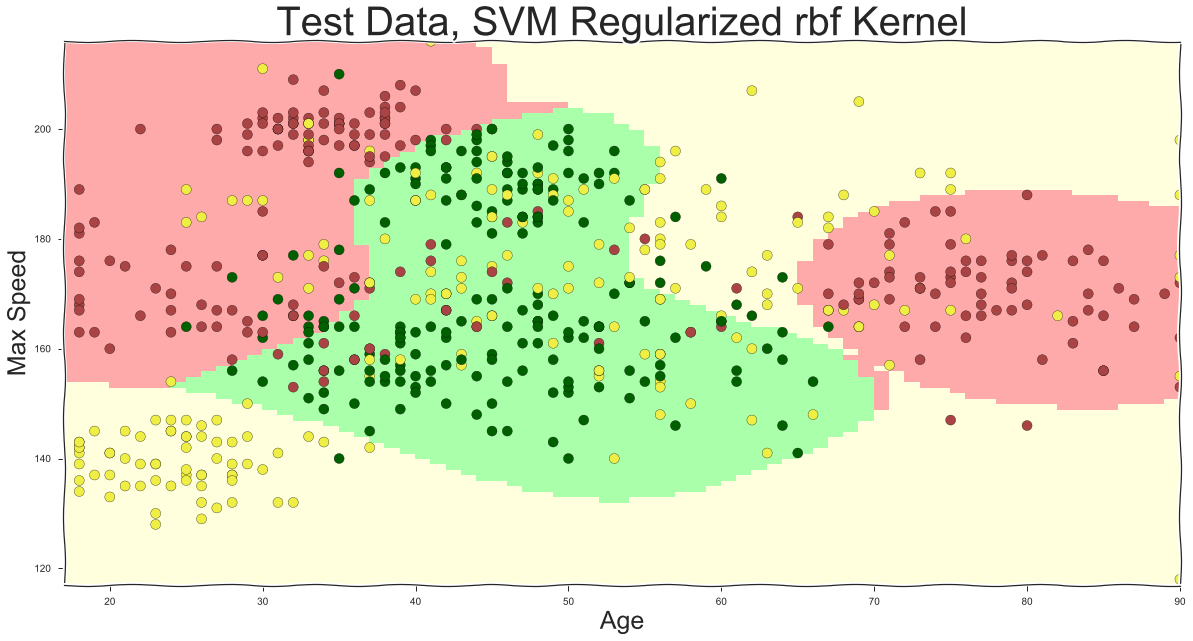

In [85]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM Regularized rbf Kernel",
                fname='svm-reg-test.png')

In [86]:
clf.score(X_test_2_dim, y_test)

0.73

## Neural Networks using TensorFlow and Keras Layers

In [87]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.8.0


In [88]:
# let's see what compute devices we have available, hopefully a GPU
sess = tf.Session()
devices = sess.list_devices()
for d in devices:
    print(d.name)
hello = tf.constant('Hello TF!')
print(sess.run(hello))

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0
b'Hello TF!'


In [89]:
# tiny little pieces of feature engeneering, we need a one-hot-encoding for our 3 groups
num_categories = 3

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_categories)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_categories)

In [90]:
# tf.keras.layers.Dense?

In [91]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(500, name='hidden1', activation='tanh', input_dim=2))
model.add(tf.keras.layers.Dense(500, name='hidden2', activation='tanh'))
# model.add(tf.keras.layers.Dense(500, name='hidden1', activation='relu', input_dim=2))
# model.add(tf.keras.layers.Dense(500, name='hidden2', activation='relu'))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 500)               1500      
_________________________________________________________________
hidden2 (Dense)              (None, 500)               250500    
_________________________________________________________________
softmax (Dense)              (None, 3)                 1503      
Total params: 253,503
Trainable params: 253,503
Non-trainable params: 0
_________________________________________________________________


In [92]:
# tf.keras.optimizers.Adam?

In [93]:
# https://keras.io/optimizers/
sgd = tf.keras.optimizers.SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=1)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
#              optimizer=adam,
#              optimizer=sgd,
             metrics=['accuracy'])

In [94]:
BATCH_SIZE=1000
EPOCHS = 2000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5',
#                                                 verbose = 1, save_best_only=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.hdf5', verbose = 1, save_best_only=True)

# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/2000
720/720 [==============================] - 0s 664us/step - loss: 1.6610 - acc: 0.3361 - val_loss: 3.2150 - val_acc: 0.3333
Epoch 2/2000
720/720 [==============================] - 0s 12us/step - loss: 3.2547 - acc: 0.3333 - val_loss: 4.2612 - val_acc: 0.3389
Epoch 3/2000
720/720 [==============================] - 0s 12us/step - loss: 4.3212 - acc: 0.3306 - val_loss: 2.9965 - val_acc: 0.3389
Epoch 4/2000
720/720 [==============================] - 0s 12us/step - loss: 3.0412 - acc: 0.3500 - val_loss: 2.5036 - val_acc: 0.3333
Epoch 5/2000
720/720 [==============================] - 0s 13us/step - loss: 2.5301 - acc: 0.3333 - val_loss: 1.2922 - val_acc: 0.3333
Epoch 6/2000
720/720 [==============================] - 0s 12us/step - loss: 1.2923 - acc: 0.3333 - val_loss: 1.3200 - val_acc: 0.3278
Epoch 7/2000
720/720 [==============================] - 0s 13us/step - loss: 1.2839 - acc: 0.3361 - val_loss: 1.9743 - val_acc: 0.3278
Epoch 8/

Epoch 61/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8768 - acc: 0.5958 - val_loss: 0.9605 - val_acc: 0.5722
Epoch 62/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8767 - acc: 0.5917 - val_loss: 0.9589 - val_acc: 0.5833
Epoch 63/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8768 - acc: 0.5972 - val_loss: 0.9593 - val_acc: 0.5833
Epoch 64/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8751 - acc: 0.5958 - val_loss: 0.9621 - val_acc: 0.5667
Epoch 65/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8728 - acc: 0.5958 - val_loss: 0.9670 - val_acc: 0.5500
Epoch 66/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8718 - acc: 0.5944 - val_loss: 0.9714 - val_acc: 0.5389
Epoch 67/2000
720/720 [==============================] - 0s 13us/step - loss: 0.8718 - acc: 0.5917 - val_loss: 0.9718 - val_acc: 0.5389
Epoch 68/2000
720/720 [=========================

720/720 [==============================] - 0s 11us/step - loss: 0.8324 - acc: 0.6486 - val_loss: 0.9377 - val_acc: 0.5722
Epoch 122/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8316 - acc: 0.6500 - val_loss: 0.9322 - val_acc: 0.6222
Epoch 123/2000
720/720 [==============================] - 0s 10us/step - loss: 0.8290 - acc: 0.6528 - val_loss: 0.9315 - val_acc: 0.6222
Epoch 124/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8281 - acc: 0.6569 - val_loss: 0.9350 - val_acc: 0.5889
Epoch 125/2000
720/720 [==============================] - 0s 10us/step - loss: 0.8291 - acc: 0.6542 - val_loss: 0.9323 - val_acc: 0.6167
Epoch 126/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8279 - acc: 0.6542 - val_loss: 0.9316 - val_acc: 0.6222
Epoch 127/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8259 - acc: 0.6597 - val_loss: 0.9328 - val_acc: 0.5944
Epoch 128/2000
720/720 [==============================] 

Epoch 181/2000
720/720 [==============================] - 0s 10us/step - loss: 0.8017 - acc: 0.6653 - val_loss: 0.9060 - val_acc: 0.6111
Epoch 182/2000
720/720 [==============================] - 0s 13us/step - loss: 0.8014 - acc: 0.6639 - val_loss: 0.9064 - val_acc: 0.6222
Epoch 183/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8019 - acc: 0.6833 - val_loss: 0.9063 - val_acc: 0.6111
Epoch 184/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8020 - acc: 0.6569 - val_loss: 0.9061 - val_acc: 0.6222
Epoch 185/2000
720/720 [==============================] - 0s 13us/step - loss: 0.8018 - acc: 0.6847 - val_loss: 0.9050 - val_acc: 0.6111
Epoch 186/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8009 - acc: 0.6583 - val_loss: 0.9042 - val_acc: 0.6278
Epoch 187/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8000 - acc: 0.6861 - val_loss: 0.9036 - val_acc: 0.6167
Epoch 188/2000
720/720 [=================

Epoch 241/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7898 - acc: 0.6528 - val_loss: 0.8887 - val_acc: 0.6500
Epoch 242/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7867 - acc: 0.6847 - val_loss: 0.8877 - val_acc: 0.6333
Epoch 243/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7859 - acc: 0.6819 - val_loss: 0.8884 - val_acc: 0.6222
Epoch 244/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7874 - acc: 0.6653 - val_loss: 0.8920 - val_acc: 0.6389
Epoch 245/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7893 - acc: 0.6875 - val_loss: 0.8893 - val_acc: 0.6333
Epoch 246/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7887 - acc: 0.6569 - val_loss: 0.8894 - val_acc: 0.6389
Epoch 247/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7871 - acc: 0.6875 - val_loss: 0.8863 - val_acc: 0.6278
Epoch 248/2000
720/720 [=================

Epoch 301/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7807 - acc: 0.6583 - val_loss: 0.8930 - val_acc: 0.6389
Epoch 302/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7908 - acc: 0.6764 - val_loss: 0.8824 - val_acc: 0.6056
Epoch 303/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7851 - acc: 0.6403 - val_loss: 0.8786 - val_acc: 0.6444
Epoch 304/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7773 - acc: 0.6819 - val_loss: 0.8753 - val_acc: 0.6667
Epoch 305/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7753 - acc: 0.6889 - val_loss: 0.8770 - val_acc: 0.6278
Epoch 306/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7803 - acc: 0.6556 - val_loss: 0.8848 - val_acc: 0.6444
Epoch 307/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7839 - acc: 0.6861 - val_loss: 0.8755 - val_acc: 0.6278
Epoch 308/2000
720/720 [=================

Epoch 361/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7719 - acc: 0.6861 - val_loss: 0.8640 - val_acc: 0.6333
Epoch 362/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7695 - acc: 0.6708 - val_loss: 0.8642 - val_acc: 0.6778
Epoch 363/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7666 - acc: 0.6861 - val_loss: 0.8634 - val_acc: 0.6667
Epoch 364/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7657 - acc: 0.6931 - val_loss: 0.8635 - val_acc: 0.6389
Epoch 365/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7672 - acc: 0.6833 - val_loss: 0.8679 - val_acc: 0.6722
Epoch 366/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7690 - acc: 0.6819 - val_loss: 0.8636 - val_acc: 0.6333
Epoch 367/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7684 - acc: 0.6750 - val_loss: 0.8646 - val_acc: 0.6778
Epoch 368/2000
720/720 [=================

Epoch 421/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7626 - acc: 0.6861 - val_loss: 0.8584 - val_acc: 0.6111
Epoch 422/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7647 - acc: 0.6625 - val_loss: 0.8647 - val_acc: 0.6722
Epoch 423/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7652 - acc: 0.6861 - val_loss: 0.8548 - val_acc: 0.6333
Epoch 424/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7613 - acc: 0.6778 - val_loss: 0.8548 - val_acc: 0.6778
Epoch 425/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7581 - acc: 0.6889 - val_loss: 0.8528 - val_acc: 0.6611
Epoch 426/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7571 - acc: 0.6972 - val_loss: 0.8527 - val_acc: 0.6500
Epoch 427/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7584 - acc: 0.6847 - val_loss: 0.8588 - val_acc: 0.6778
Epoch 428/2000
720/720 [=================

Epoch 481/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7523 - acc: 0.6875 - val_loss: 0.8458 - val_acc: 0.6444
Epoch 482/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7533 - acc: 0.6819 - val_loss: 0.8526 - val_acc: 0.6778
Epoch 483/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7545 - acc: 0.6819 - val_loss: 0.8467 - val_acc: 0.6278
Epoch 484/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7547 - acc: 0.6764 - val_loss: 0.8540 - val_acc: 0.6778
Epoch 485/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7554 - acc: 0.6819 - val_loss: 0.8469 - val_acc: 0.6222
Epoch 486/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7549 - acc: 0.6778 - val_loss: 0.8537 - val_acc: 0.6778
Epoch 487/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7551 - acc: 0.6819 - val_loss: 0.8463 - val_acc: 0.6333
Epoch 488/2000
720/720 [=================

Epoch 541/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7525 - acc: 0.6833 - val_loss: 0.8445 - val_acc: 0.6222
Epoch 542/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7542 - acc: 0.6667 - val_loss: 0.8591 - val_acc: 0.6722
Epoch 543/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7576 - acc: 0.6792 - val_loss: 0.8464 - val_acc: 0.6056
Epoch 544/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7567 - acc: 0.6625 - val_loss: 0.8586 - val_acc: 0.6722
Epoch 545/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7564 - acc: 0.6819 - val_loss: 0.8429 - val_acc: 0.6222
Epoch 546/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7510 - acc: 0.6750 - val_loss: 0.8471 - val_acc: 0.6722
Epoch 547/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7467 - acc: 0.6819 - val_loss: 0.8391 - val_acc: 0.6556
Epoch 548/2000
720/720 [=================

Epoch 601/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7404 - acc: 0.6958 - val_loss: 0.8359 - val_acc: 0.6444
Epoch 602/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7414 - acc: 0.6806 - val_loss: 0.8422 - val_acc: 0.6667
Epoch 603/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7406 - acc: 0.6917 - val_loss: 0.8354 - val_acc: 0.6611
Epoch 604/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7386 - acc: 0.6958 - val_loss: 0.8350 - val_acc: 0.6611
Epoch 605/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7374 - acc: 0.6986 - val_loss: 0.8366 - val_acc: 0.6722
Epoch 606/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7379 - acc: 0.6986 - val_loss: 0.8354 - val_acc: 0.6500
Epoch 607/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7390 - acc: 0.6903 - val_loss: 0.8415 - val_acc: 0.6667
Epoch 608/2000
720/720 [=================

Epoch 661/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7359 - acc: 0.6944 - val_loss: 0.8322 - val_acc: 0.6611
Epoch 662/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7337 - acc: 0.7014 - val_loss: 0.8331 - val_acc: 0.6611
Epoch 663/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7327 - acc: 0.6944 - val_loss: 0.8374 - val_acc: 0.6722
Epoch 664/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7334 - acc: 0.6958 - val_loss: 0.8324 - val_acc: 0.6556
Epoch 665/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7342 - acc: 0.6944 - val_loss: 0.8357 - val_acc: 0.6667
Epoch 666/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7341 - acc: 0.7028 - val_loss: 0.8316 - val_acc: 0.6667
Epoch 667/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7329 - acc: 0.7014 - val_loss: 0.8332 - val_acc: 0.6667
Epoch 668/2000
720/720 [=================

Epoch 721/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7276 - acc: 0.6986 - val_loss: 0.8298 - val_acc: 0.6722
Epoch 722/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7274 - acc: 0.7000 - val_loss: 0.8297 - val_acc: 0.6722
Epoch 723/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7274 - acc: 0.7042 - val_loss: 0.8314 - val_acc: 0.6722
Epoch 724/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7275 - acc: 0.7014 - val_loss: 0.8289 - val_acc: 0.6667
Epoch 725/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7277 - acc: 0.7028 - val_loss: 0.8326 - val_acc: 0.6722
Epoch 726/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7280 - acc: 0.7014 - val_loss: 0.8285 - val_acc: 0.6556
Epoch 727/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7284 - acc: 0.7014 - val_loss: 0.8343 - val_acc: 0.6722
Epoch 728/2000
720/720 [=================

Epoch 781/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7556 - acc: 0.6847 - val_loss: 0.8440 - val_acc: 0.5944
Epoch 782/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7513 - acc: 0.6556 - val_loss: 0.8552 - val_acc: 0.6722
Epoch 783/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7395 - acc: 0.6903 - val_loss: 0.8257 - val_acc: 0.6556
Epoch 784/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7258 - acc: 0.6917 - val_loss: 0.8303 - val_acc: 0.6556
Epoch 785/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7248 - acc: 0.7014 - val_loss: 0.8510 - val_acc: 0.6778
Epoch 786/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7329 - acc: 0.6917 - val_loss: 0.8356 - val_acc: 0.6167
Epoch 787/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7360 - acc: 0.6667 - val_loss: 0.8484 - val_acc: 0.6667
Epoch 788/2000
720/720 [=================

Epoch 841/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7335 - acc: 0.6931 - val_loss: 0.8300 - val_acc: 0.6278
Epoch 842/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7295 - acc: 0.6861 - val_loss: 0.8392 - val_acc: 0.6722
Epoch 843/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7241 - acc: 0.6958 - val_loss: 0.8263 - val_acc: 0.6611
Epoch 844/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7196 - acc: 0.7042 - val_loss: 0.8282 - val_acc: 0.6722
Epoch 845/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7186 - acc: 0.7056 - val_loss: 0.8351 - val_acc: 0.6722
Epoch 846/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7206 - acc: 0.7028 - val_loss: 0.8285 - val_acc: 0.6611
Epoch 847/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7234 - acc: 0.6875 - val_loss: 0.8412 - val_acc: 0.6667
Epoch 848/2000
720/720 [=================

Epoch 901/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7148 - acc: 0.7042 - val_loss: 0.8304 - val_acc: 0.6722
Epoch 902/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7156 - acc: 0.7028 - val_loss: 0.8256 - val_acc: 0.6611
Epoch 903/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7163 - acc: 0.6986 - val_loss: 0.8322 - val_acc: 0.6722
Epoch 904/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7164 - acc: 0.7028 - val_loss: 0.8254 - val_acc: 0.6611
Epoch 905/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7159 - acc: 0.7000 - val_loss: 0.8309 - val_acc: 0.6722
Epoch 906/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7152 - acc: 0.7028 - val_loss: 0.8263 - val_acc: 0.6722
Epoch 907/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7145 - acc: 0.7028 - val_loss: 0.8273 - val_acc: 0.6778
Epoch 908/2000
720/720 [=================

Epoch 961/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7198 - acc: 0.6875 - val_loss: 0.8599 - val_acc: 0.6722
Epoch 962/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7234 - acc: 0.7056 - val_loss: 0.8291 - val_acc: 0.6389
Epoch 963/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7164 - acc: 0.6944 - val_loss: 0.8315 - val_acc: 0.6611
Epoch 964/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7140 - acc: 0.7014 - val_loss: 0.8419 - val_acc: 0.6722
Epoch 965/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7174 - acc: 0.7056 - val_loss: 0.8243 - val_acc: 0.6389
Epoch 966/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7174 - acc: 0.6972 - val_loss: 0.8437 - val_acc: 0.6722
Epoch 967/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7142 - acc: 0.7069 - val_loss: 0.8343 - val_acc: 0.6722
Epoch 968/2000
720/720 [=================

Epoch 1021/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7257 - acc: 0.6778 - val_loss: 0.8548 - val_acc: 0.6611
Epoch 1022/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7256 - acc: 0.6986 - val_loss: 0.8316 - val_acc: 0.6333
Epoch 1023/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7217 - acc: 0.6847 - val_loss: 0.8403 - val_acc: 0.6722
Epoch 1024/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7130 - acc: 0.6958 - val_loss: 0.8241 - val_acc: 0.6722
Epoch 1025/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7073 - acc: 0.7083 - val_loss: 0.8289 - val_acc: 0.6667
Epoch 1026/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7077 - acc: 0.7028 - val_loss: 0.8386 - val_acc: 0.6667
Epoch 1027/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7117 - acc: 0.6958 - val_loss: 0.8295 - val_acc: 0.6444
Epoch 1028/2000
720/720 [=========

Epoch 1081/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7026 - acc: 0.7069 - val_loss: 0.8290 - val_acc: 0.6778
Epoch 1082/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7028 - acc: 0.7097 - val_loss: 0.8237 - val_acc: 0.6722
Epoch 1083/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7030 - acc: 0.7097 - val_loss: 0.8305 - val_acc: 0.6722
Epoch 1084/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7034 - acc: 0.7097 - val_loss: 0.8241 - val_acc: 0.6667
Epoch 1085/2000
720/720 [==============================] - 0s 10us/step - loss: 0.7040 - acc: 0.7028 - val_loss: 0.8322 - val_acc: 0.6722
Epoch 1086/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7049 - acc: 0.7069 - val_loss: 0.8256 - val_acc: 0.6667
Epoch 1087/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7064 - acc: 0.6944 - val_loss: 0.8360 - val_acc: 0.6556
Epoch 1088/2000
720/720 [=========

Epoch 1141/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7006 - acc: 0.7097 - val_loss: 0.8325 - val_acc: 0.6722
Epoch 1142/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6997 - acc: 0.7097 - val_loss: 0.8217 - val_acc: 0.6611
Epoch 1143/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7001 - acc: 0.7097 - val_loss: 0.8352 - val_acc: 0.6778
Epoch 1144/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7015 - acc: 0.7111 - val_loss: 0.8221 - val_acc: 0.6556
Epoch 1145/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7025 - acc: 0.7056 - val_loss: 0.8359 - val_acc: 0.6722
Epoch 1146/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7029 - acc: 0.7153 - val_loss: 0.8222 - val_acc: 0.6556
Epoch 1147/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7016 - acc: 0.7028 - val_loss: 0.8324 - val_acc: 0.6778
Epoch 1148/2000
720/720 [=========

Epoch 1201/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7110 - acc: 0.7000 - val_loss: 0.8454 - val_acc: 0.6500
Epoch 1202/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7093 - acc: 0.6958 - val_loss: 0.8282 - val_acc: 0.6389
Epoch 1203/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7078 - acc: 0.6917 - val_loss: 0.8433 - val_acc: 0.6722
Epoch 1204/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7025 - acc: 0.7014 - val_loss: 0.8197 - val_acc: 0.6500
Epoch 1205/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6978 - acc: 0.7111 - val_loss: 0.8332 - val_acc: 0.6778
Epoch 1206/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6968 - acc: 0.7153 - val_loss: 0.8263 - val_acc: 0.6500
Epoch 1207/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6978 - acc: 0.7069 - val_loss: 0.8271 - val_acc: 0.6722
Epoch 1208/2000
720/720 [=========

Epoch 1261/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7011 - acc: 0.6986 - val_loss: 0.8319 - val_acc: 0.6389
Epoch 1262/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7058 - acc: 0.6972 - val_loss: 0.8418 - val_acc: 0.6556
Epoch 1263/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6996 - acc: 0.7014 - val_loss: 0.8235 - val_acc: 0.6611
Epoch 1264/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6925 - acc: 0.7139 - val_loss: 0.8255 - val_acc: 0.6611
Epoch 1265/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6916 - acc: 0.7194 - val_loss: 0.8397 - val_acc: 0.6667
Epoch 1266/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6961 - acc: 0.7028 - val_loss: 0.8279 - val_acc: 0.6444
Epoch 1267/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6990 - acc: 0.7056 - val_loss: 0.8327 - val_acc: 0.6500
Epoch 1268/2000
720/720 [=========

Epoch 1321/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6891 - acc: 0.7111 - val_loss: 0.8202 - val_acc: 0.6556
Epoch 1322/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6885 - acc: 0.7167 - val_loss: 0.8306 - val_acc: 0.6722
Epoch 1323/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6888 - acc: 0.7167 - val_loss: 0.8157 - val_acc: 0.6389
Epoch 1324/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6904 - acc: 0.7194 - val_loss: 0.8436 - val_acc: 0.6722
Epoch 1325/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6948 - acc: 0.7139 - val_loss: 0.8181 - val_acc: 0.6278
Epoch 1326/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6995 - acc: 0.6986 - val_loss: 0.8730 - val_acc: 0.6778
Epoch 1327/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7124 - acc: 0.7111 - val_loss: 0.8252 - val_acc: 0.6167
Epoch 1328/2000
720/720 [=========

Epoch 1381/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6942 - acc: 0.7097 - val_loss: 0.8296 - val_acc: 0.6389
Epoch 1382/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6916 - acc: 0.7042 - val_loss: 0.8268 - val_acc: 0.6556
Epoch 1383/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6895 - acc: 0.7125 - val_loss: 0.8253 - val_acc: 0.6444
Epoch 1384/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6855 - acc: 0.7083 - val_loss: 0.8205 - val_acc: 0.6667
Epoch 1385/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6833 - acc: 0.7139 - val_loss: 0.8226 - val_acc: 0.6722
Epoch 1386/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6830 - acc: 0.7167 - val_loss: 0.8197 - val_acc: 0.6500
Epoch 1387/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6844 - acc: 0.7111 - val_loss: 0.8247 - val_acc: 0.6667
Epoch 1388/2000
720/720 [=========

Epoch 1441/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6838 - acc: 0.7125 - val_loss: 0.8428 - val_acc: 0.6778
Epoch 1442/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6890 - acc: 0.7181 - val_loss: 0.8164 - val_acc: 0.6333
Epoch 1443/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6965 - acc: 0.6972 - val_loss: 0.8872 - val_acc: 0.6778
Epoch 1444/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7183 - acc: 0.7083 - val_loss: 0.8301 - val_acc: 0.6111
Epoch 1445/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7206 - acc: 0.6694 - val_loss: 0.9160 - val_acc: 0.6778
Epoch 1446/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7377 - acc: 0.7111 - val_loss: 0.8204 - val_acc: 0.6167
Epoch 1447/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7000 - acc: 0.7000 - val_loss: 0.8379 - val_acc: 0.6611
Epoch 1448/2000
720/720 [=========

Epoch 1501/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6957 - acc: 0.7069 - val_loss: 0.8402 - val_acc: 0.6556
Epoch 1502/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6929 - acc: 0.6972 - val_loss: 0.8228 - val_acc: 0.6389
Epoch 1503/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6898 - acc: 0.7083 - val_loss: 0.8303 - val_acc: 0.6500
Epoch 1504/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6805 - acc: 0.7139 - val_loss: 0.8145 - val_acc: 0.6556
Epoch 1505/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.7194 - val_loss: 0.8226 - val_acc: 0.6667
Epoch 1506/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6790 - acc: 0.7236 - val_loss: 0.8252 - val_acc: 0.6333
Epoch 1507/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6828 - acc: 0.7042 - val_loss: 0.8211 - val_acc: 0.6500
Epoch 1508/2000
720/720 [=========

Epoch 1561/2000
720/720 [==============================] - 0s 35us/step - loss: 0.6747 - acc: 0.7222 - val_loss: 0.8119 - val_acc: 0.6500
Epoch 1562/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6722 - acc: 0.7222 - val_loss: 0.8116 - val_acc: 0.6500
Epoch 1563/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6722 - acc: 0.7236 - val_loss: 0.8284 - val_acc: 0.6667
Epoch 1564/2000
720/720 [==============================] - 0s 35us/step - loss: 0.6744 - acc: 0.7222 - val_loss: 0.8115 - val_acc: 0.6333
Epoch 1565/2000
720/720 [==============================] - 0s 43us/step - loss: 0.6744 - acc: 0.7236 - val_loss: 0.8229 - val_acc: 0.6722
Epoch 1566/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6730 - acc: 0.7236 - val_loss: 0.8120 - val_acc: 0.6500
Epoch 1567/2000
720/720 [==============================] - 0s 37us/step - loss: 0.6718 - acc: 0.7194 - val_loss: 0.8142 - val_acc: 0.6611
Epoch 1568/2000
720/720 [=========

Epoch 1621/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6701 - acc: 0.7208 - val_loss: 0.8090 - val_acc: 0.6444
Epoch 1622/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6701 - acc: 0.7264 - val_loss: 0.8198 - val_acc: 0.6667
Epoch 1623/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6695 - acc: 0.7236 - val_loss: 0.8062 - val_acc: 0.6444
Epoch 1624/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6688 - acc: 0.7264 - val_loss: 0.8192 - val_acc: 0.6722
Epoch 1625/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6690 - acc: 0.7278 - val_loss: 0.8061 - val_acc: 0.6500
Epoch 1626/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6699 - acc: 0.7278 - val_loss: 0.8270 - val_acc: 0.6778
Epoch 1627/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6726 - acc: 0.7222 - val_loss: 0.8094 - val_acc: 0.6556
Epoch 1628/2000
720/720 [=============

Epoch 1681/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6654 - acc: 0.7264 - val_loss: 0.8189 - val_acc: 0.6722
Epoch 1682/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6657 - acc: 0.7250 - val_loss: 0.8033 - val_acc: 0.6389
Epoch 1683/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6658 - acc: 0.7250 - val_loss: 0.8211 - val_acc: 0.6722
Epoch 1684/2000
720/720 [==============================] - 0s 32us/step - loss: 0.6667 - acc: 0.7250 - val_loss: 0.8018 - val_acc: 0.6389
Epoch 1685/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6675 - acc: 0.7250 - val_loss: 0.8272 - val_acc: 0.6722
Epoch 1686/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6700 - acc: 0.7181 - val_loss: 0.8030 - val_acc: 0.6389
Epoch 1687/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6721 - acc: 0.7167 - val_loss: 0.8396 - val_acc: 0.6667
Epoch 1688/2000
720/720 [===========

Epoch 1741/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6620 - acc: 0.7194 - val_loss: 0.8028 - val_acc: 0.6500
Epoch 1742/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6625 - acc: 0.7361 - val_loss: 0.8123 - val_acc: 0.6667
Epoch 1743/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6621 - acc: 0.7194 - val_loss: 0.8035 - val_acc: 0.6500
Epoch 1744/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6616 - acc: 0.7347 - val_loss: 0.8124 - val_acc: 0.6667
Epoch 1745/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6607 - acc: 0.7264 - val_loss: 0.8028 - val_acc: 0.6667
Epoch 1746/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6599 - acc: 0.7361 - val_loss: 0.8062 - val_acc: 0.6667
Epoch 1747/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6593 - acc: 0.7250 - val_loss: 0.8035 - val_acc: 0.6667
Epoch 1748/2000
720/720 [=============

Epoch 1801/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6589 - acc: 0.7222 - val_loss: 0.7986 - val_acc: 0.6500
Epoch 1802/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6605 - acc: 0.7361 - val_loss: 0.8156 - val_acc: 0.6667
Epoch 1803/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6609 - acc: 0.7194 - val_loss: 0.7994 - val_acc: 0.6500
Epoch 1804/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6610 - acc: 0.7375 - val_loss: 0.8149 - val_acc: 0.6667
Epoch 1805/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6596 - acc: 0.7181 - val_loss: 0.7988 - val_acc: 0.6556
Epoch 1806/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6581 - acc: 0.7333 - val_loss: 0.8099 - val_acc: 0.6667
Epoch 1807/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6567 - acc: 0.7292 - val_loss: 0.7990 - val_acc: 0.6667
Epoch 1808/2000
720/720 [============

Epoch 1861/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6541 - acc: 0.7319 - val_loss: 0.8054 - val_acc: 0.6667
Epoch 1862/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6542 - acc: 0.7278 - val_loss: 0.8030 - val_acc: 0.6500
Epoch 1863/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6555 - acc: 0.7347 - val_loss: 0.8009 - val_acc: 0.6556
Epoch 1864/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6560 - acc: 0.7167 - val_loss: 0.8102 - val_acc: 0.6833
Epoch 1865/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6566 - acc: 0.7236 - val_loss: 0.7966 - val_acc: 0.6611
Epoch 1866/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6561 - acc: 0.7250 - val_loss: 0.8136 - val_acc: 0.6722
Epoch 1867/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6562 - acc: 0.7278 - val_loss: 0.7940 - val_acc: 0.6444
Epoch 1868/2000
720/720 [============

Epoch 1921/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6567 - acc: 0.7250 - val_loss: 0.7945 - val_acc: 0.6611
Epoch 1922/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6540 - acc: 0.7194 - val_loss: 0.8066 - val_acc: 0.6611
Epoch 1923/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6509 - acc: 0.7264 - val_loss: 0.8029 - val_acc: 0.6667
Epoch 1924/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6490 - acc: 0.7250 - val_loss: 0.7923 - val_acc: 0.6556
Epoch 1925/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6498 - acc: 0.7306 - val_loss: 0.8067 - val_acc: 0.6833
Epoch 1926/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6514 - acc: 0.7306 - val_loss: 0.7915 - val_acc: 0.6556
Epoch 1927/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6509 - acc: 0.7264 - val_loss: 0.8038 - val_acc: 0.6722
Epoch 1928/2000
720/720 [============

Epoch 1981/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6579 - acc: 0.7125 - val_loss: 0.8210 - val_acc: 0.6722
Epoch 1982/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6594 - acc: 0.7181 - val_loss: 0.7958 - val_acc: 0.6611
Epoch 1983/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6543 - acc: 0.7194 - val_loss: 0.8168 - val_acc: 0.6889
Epoch 1984/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6514 - acc: 0.7319 - val_loss: 0.7911 - val_acc: 0.6667
Epoch 1985/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6488 - acc: 0.7361 - val_loss: 0.8127 - val_acc: 0.6722
Epoch 1986/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6499 - acc: 0.7194 - val_loss: 0.7945 - val_acc: 0.6500
Epoch 1987/2000
720/720 [==============================] - 0s 0us/step - loss: 0.6524 - acc: 0.7403 - val_loss: 0.8077 - val_acc: 0.6611
Epoch 1988/2000
720/720 [============

In [95]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 0us/step


0.7244444489479065

In [96]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 0us/step


0.6949999928474426

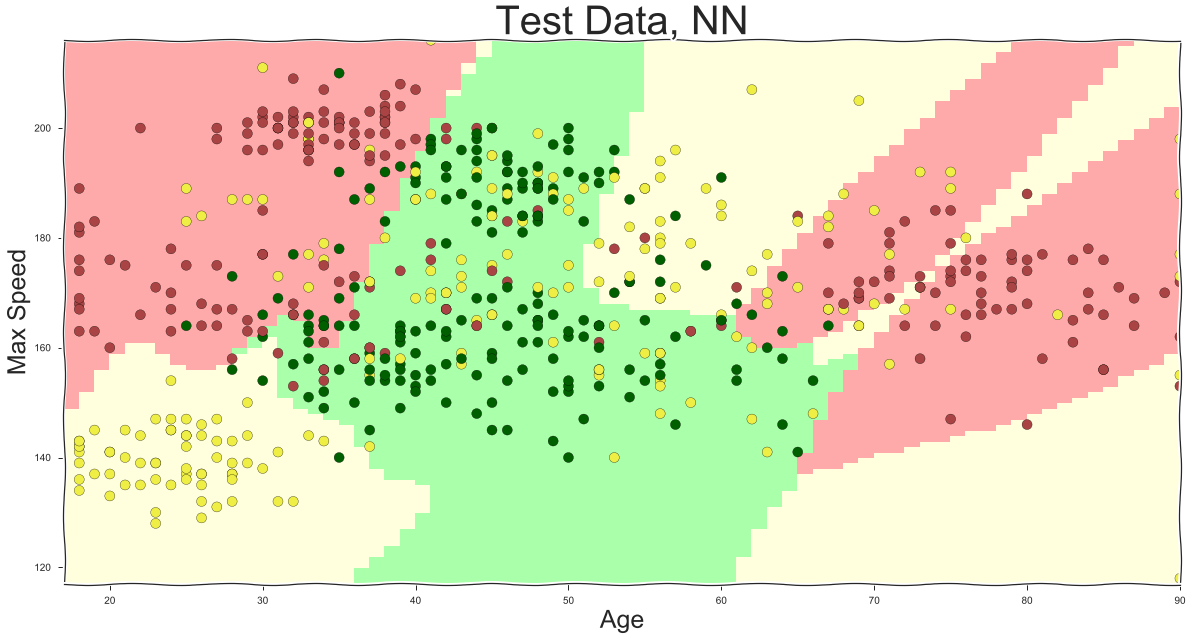

In [97]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, NN",
                fname='nn-test.png')

In [122]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# regularisation:
# - dropout
# - batch normalization
# - reduce capacity of model

dropout = 0.6
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name='hidden1', input_dim=2))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(100, name='hidden2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               300       
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
__________

In [123]:
BATCH_SIZE=1000
EPOCHS = 3000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, verbose=1)

%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stopping])
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/3000
720/720 [==============================] - 1s 1ms/step - loss: 1.5255 - acc: 0.3458 - val_loss: 7.3326 - val_acc: 0.3278
Epoch 2/3000
720/720 [==============================] - 0s 22us/step - loss: 1.4633 - acc: 0.3556 - val_loss: 8.2267 - val_acc: 0.3278
Epoch 3/3000
720/720 [==============================] - 0s 17us/step - loss: 1.3799 - acc: 0.3847 - val_loss: 9.0351 - val_acc: 0.3278
Epoch 4/3000
720/720 [==============================] - 0s 29us/step - loss: 1.4161 - acc: 0.3764 - val_loss: 9.6880 - val_acc: 0.3278
Epoch 5/3000
720/720 [==============================] - 0s 18us/step - loss: 1.3546 - acc: 0.3986 - val_loss: 10.0058 - val_acc: 0.3278
Epoch 6/3000
720/720 [==============================] - 0s 15us/step - loss: 1.3450 - acc: 0.3903 - val_loss: 10.1490 - val_acc: 0.3278
Epoch 7/3000
720/720 [==============================] - 0s 15us/step - loss: 1.3141 - acc: 0.3931 - val_loss: 10.1950 - val_acc: 0.3278
Epoch 8

Epoch 61/3000
720/720 [==============================] - 0s 43us/step - loss: 0.9787 - acc: 0.5472 - val_loss: 3.1278 - val_acc: 0.4056
Epoch 62/3000
720/720 [==============================] - 0s 42us/step - loss: 0.9160 - acc: 0.5653 - val_loss: 3.0975 - val_acc: 0.4111
Epoch 63/3000
720/720 [==============================] - 0s 29us/step - loss: 0.9169 - acc: 0.6042 - val_loss: 3.0687 - val_acc: 0.4111
Epoch 64/3000
720/720 [==============================] - 0s 44us/step - loss: 0.9390 - acc: 0.5903 - val_loss: 3.0349 - val_acc: 0.4167
Epoch 65/3000
720/720 [==============================] - 0s 43us/step - loss: 0.9173 - acc: 0.5847 - val_loss: 2.9992 - val_acc: 0.4222
Epoch 66/3000
720/720 [==============================] - 0s 25us/step - loss: 0.9268 - acc: 0.5694 - val_loss: 2.9675 - val_acc: 0.4278
Epoch 67/3000
720/720 [==============================] - 0s 22us/step - loss: 0.9495 - acc: 0.5722 - val_loss: 2.9402 - val_acc: 0.4444
Epoch 68/3000
720/720 [=========================

Epoch 122/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8340 - acc: 0.6222 - val_loss: 2.0416 - val_acc: 0.4278
Epoch 123/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8710 - acc: 0.6056 - val_loss: 2.0367 - val_acc: 0.4222
Epoch 124/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8543 - acc: 0.6125 - val_loss: 2.0271 - val_acc: 0.4167
Epoch 125/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8412 - acc: 0.6361 - val_loss: 2.0185 - val_acc: 0.4167
Epoch 126/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8578 - acc: 0.6208 - val_loss: 2.0126 - val_acc: 0.4278
Epoch 127/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8549 - acc: 0.6139 - val_loss: 2.0069 - val_acc: 0.4167
Epoch 128/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8782 - acc: 0.6181 - val_loss: 1.9978 - val_acc: 0.4111
Epoch 129/3000
720/720 [====================

Epoch 182/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8066 - acc: 0.6542 - val_loss: 1.3010 - val_acc: 0.4722
Epoch 183/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8014 - acc: 0.6625 - val_loss: 1.2931 - val_acc: 0.4778
Epoch 184/3000
720/720 [==============================] - 0s 34us/step - loss: 0.8103 - acc: 0.6569 - val_loss: 1.2867 - val_acc: 0.4833
Epoch 185/3000
720/720 [==============================] - 0s 14us/step - loss: 0.8287 - acc: 0.6417 - val_loss: 1.2810 - val_acc: 0.4889
Epoch 186/3000
720/720 [==============================] - 0s 14us/step - loss: 0.8048 - acc: 0.6500 - val_loss: 1.2764 - val_acc: 0.4889
Epoch 187/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8081 - acc: 0.6514 - val_loss: 1.2703 - val_acc: 0.4944
Epoch 188/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8462 - acc: 0.6250 - val_loss: 1.2645 - val_acc: 0.4833
Epoch 189/3000
720/720 [===================

Epoch 242/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7828 - acc: 0.6778 - val_loss: 0.9241 - val_acc: 0.5778
Epoch 243/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8084 - acc: 0.6486 - val_loss: 0.9191 - val_acc: 0.5889
Epoch 244/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8077 - acc: 0.6542 - val_loss: 0.9144 - val_acc: 0.5889
Epoch 245/3000
720/720 [==============================] - 0s 22us/step - loss: 0.8146 - acc: 0.6472 - val_loss: 0.9105 - val_acc: 0.5889
Epoch 246/3000
720/720 [==============================] - 0s 0us/step - loss: 0.8250 - acc: 0.6181 - val_loss: 0.9064 - val_acc: 0.5889
Epoch 247/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7746 - acc: 0.6736 - val_loss: 0.9030 - val_acc: 0.5889
Epoch 248/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7750 - acc: 0.6639 - val_loss: 0.8996 - val_acc: 0.5889
Epoch 249/3000
720/720 [===================

Epoch 302/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7855 - acc: 0.6458 - val_loss: 0.7916 - val_acc: 0.6333
Epoch 303/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7942 - acc: 0.6542 - val_loss: 0.7897 - val_acc: 0.6333
Epoch 304/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7884 - acc: 0.6556 - val_loss: 0.7881 - val_acc: 0.6333
Epoch 305/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7726 - acc: 0.6653 - val_loss: 0.7864 - val_acc: 0.6333
Epoch 306/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7823 - acc: 0.6500 - val_loss: 0.7845 - val_acc: 0.6333
Epoch 307/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7799 - acc: 0.6569 - val_loss: 0.7833 - val_acc: 0.6333
Epoch 308/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7748 - acc: 0.6694 - val_loss: 0.7810 - val_acc: 0.6333
Epoch 309/3000
720/720 [===================

Epoch 362/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7801 - acc: 0.6597 - val_loss: 0.7262 - val_acc: 0.6889
Epoch 363/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7649 - acc: 0.6750 - val_loss: 0.7258 - val_acc: 0.6889
Epoch 364/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7587 - acc: 0.6917 - val_loss: 0.7249 - val_acc: 0.6889
Epoch 365/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7691 - acc: 0.6556 - val_loss: 0.7243 - val_acc: 0.6833
Epoch 366/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7797 - acc: 0.6708 - val_loss: 0.7238 - val_acc: 0.6889
Epoch 367/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7725 - acc: 0.6569 - val_loss: 0.7236 - val_acc: 0.6833
Epoch 368/3000
720/720 [==============================] - 0s 35us/step - loss: 0.7642 - acc: 0.6653 - val_loss: 0.7234 - val_acc: 0.6833
Epoch 369/3000
720/720 [===================

Epoch 422/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7698 - acc: 0.6375 - val_loss: 0.7136 - val_acc: 0.7000
Epoch 423/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7590 - acc: 0.6736 - val_loss: 0.7132 - val_acc: 0.7000
Epoch 424/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7700 - acc: 0.6667 - val_loss: 0.7130 - val_acc: 0.7000
Epoch 425/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7576 - acc: 0.6639 - val_loss: 0.7130 - val_acc: 0.7000
Epoch 426/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7676 - acc: 0.6653 - val_loss: 0.7132 - val_acc: 0.7000
Epoch 427/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7652 - acc: 0.6750 - val_loss: 0.7138 - val_acc: 0.7000
Epoch 428/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7519 - acc: 0.6764 - val_loss: 0.7142 - val_acc: 0.6889
Epoch 429/3000
720/720 [====================

Epoch 482/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7657 - acc: 0.6833 - val_loss: 0.7056 - val_acc: 0.6889
Epoch 483/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7733 - acc: 0.6667 - val_loss: 0.7072 - val_acc: 0.6778
Epoch 484/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7647 - acc: 0.6806 - val_loss: 0.7084 - val_acc: 0.6722
Epoch 485/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7462 - acc: 0.6792 - val_loss: 0.7096 - val_acc: 0.6722
Epoch 486/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7502 - acc: 0.6847 - val_loss: 0.7105 - val_acc: 0.6722
Epoch 487/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7544 - acc: 0.6931 - val_loss: 0.7111 - val_acc: 0.6722
Epoch 488/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7680 - acc: 0.6694 - val_loss: 0.7111 - val_acc: 0.6778
Epoch 489/3000
720/720 [===================

Epoch 542/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7866 - acc: 0.6681 - val_loss: 0.6968 - val_acc: 0.6944
Epoch 543/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7547 - acc: 0.6792 - val_loss: 0.6972 - val_acc: 0.6889
Epoch 544/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7596 - acc: 0.6806 - val_loss: 0.6976 - val_acc: 0.6944
Epoch 545/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7516 - acc: 0.6903 - val_loss: 0.6981 - val_acc: 0.6944
Epoch 546/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7734 - acc: 0.6736 - val_loss: 0.6982 - val_acc: 0.6944
Epoch 547/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7543 - acc: 0.6944 - val_loss: 0.6979 - val_acc: 0.6944
Epoch 548/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7691 - acc: 0.6681 - val_loss: 0.6976 - val_acc: 0.6944
Epoch 549/3000
720/720 [===================

Epoch 602/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7365 - acc: 0.6778 - val_loss: 0.6954 - val_acc: 0.7056
Epoch 603/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7480 - acc: 0.6917 - val_loss: 0.6955 - val_acc: 0.7056
Epoch 604/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7346 - acc: 0.6625 - val_loss: 0.6956 - val_acc: 0.7056
Epoch 605/3000
720/720 [==============================] - 0s 27us/step - loss: 0.7352 - acc: 0.6903 - val_loss: 0.6959 - val_acc: 0.7056
Epoch 606/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7454 - acc: 0.6764 - val_loss: 0.6962 - val_acc: 0.7056
Epoch 607/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7637 - acc: 0.6694 - val_loss: 0.6961 - val_acc: 0.7000
Epoch 608/3000
720/720 [==============================] - 0s 13us/step - loss: 0.7240 - acc: 0.6889 - val_loss: 0.6965 - val_acc: 0.7000
Epoch 609/3000
720/720 [==================

Epoch 662/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7181 - acc: 0.6903 - val_loss: 0.6972 - val_acc: 0.6778
Epoch 663/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7484 - acc: 0.6861 - val_loss: 0.6972 - val_acc: 0.6833
Epoch 664/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7529 - acc: 0.6819 - val_loss: 0.6971 - val_acc: 0.6833
Epoch 665/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7519 - acc: 0.6931 - val_loss: 0.6967 - val_acc: 0.6833
Epoch 666/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7362 - acc: 0.6833 - val_loss: 0.6962 - val_acc: 0.6833
Epoch 667/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7526 - acc: 0.6778 - val_loss: 0.6958 - val_acc: 0.6833
Epoch 668/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7429 - acc: 0.6625 - val_loss: 0.6956 - val_acc: 0.6833
Epoch 669/3000
720/720 [====================

Epoch 722/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7355 - acc: 0.6833 - val_loss: 0.6998 - val_acc: 0.6667
Epoch 723/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7488 - acc: 0.6708 - val_loss: 0.6999 - val_acc: 0.6667
Epoch 724/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7354 - acc: 0.7000 - val_loss: 0.6998 - val_acc: 0.6611
Epoch 725/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7524 - acc: 0.6917 - val_loss: 0.6995 - val_acc: 0.6556
Epoch 726/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7447 - acc: 0.6847 - val_loss: 0.6990 - val_acc: 0.6556
Epoch 727/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7455 - acc: 0.6736 - val_loss: 0.6984 - val_acc: 0.6667
Epoch 728/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7240 - acc: 0.6889 - val_loss: 0.6979 - val_acc: 0.6667
Epoch 729/3000
720/720 [====================

Epoch 782/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7329 - acc: 0.6875 - val_loss: 0.6877 - val_acc: 0.6889
Epoch 783/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7409 - acc: 0.6861 - val_loss: 0.6875 - val_acc: 0.6944
Epoch 784/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7357 - acc: 0.6903 - val_loss: 0.6873 - val_acc: 0.6944
Epoch 785/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7411 - acc: 0.6806 - val_loss: 0.6867 - val_acc: 0.6944
Epoch 786/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7249 - acc: 0.6847 - val_loss: 0.6862 - val_acc: 0.6944
Epoch 787/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7339 - acc: 0.6875 - val_loss: 0.6855 - val_acc: 0.6944
Epoch 788/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7299 - acc: 0.6792 - val_loss: 0.6846 - val_acc: 0.6944
Epoch 789/3000
720/720 [====================

Epoch 842/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7254 - acc: 0.6986 - val_loss: 0.6911 - val_acc: 0.6778
Epoch 843/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7429 - acc: 0.6792 - val_loss: 0.6910 - val_acc: 0.6778
Epoch 844/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7244 - acc: 0.6847 - val_loss: 0.6905 - val_acc: 0.6778
Epoch 845/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7119 - acc: 0.6833 - val_loss: 0.6905 - val_acc: 0.6778
Epoch 846/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7111 - acc: 0.6958 - val_loss: 0.6908 - val_acc: 0.6778
Epoch 847/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7437 - acc: 0.6792 - val_loss: 0.6919 - val_acc: 0.6722
Epoch 848/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7306 - acc: 0.6778 - val_loss: 0.6935 - val_acc: 0.6722
Epoch 849/3000
720/720 [====================

Epoch 902/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7051 - acc: 0.7028 - val_loss: 0.6854 - val_acc: 0.6889
Epoch 903/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7262 - acc: 0.6806 - val_loss: 0.6852 - val_acc: 0.6833
Epoch 904/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7127 - acc: 0.6750 - val_loss: 0.6849 - val_acc: 0.6833
Epoch 905/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7319 - acc: 0.6750 - val_loss: 0.6846 - val_acc: 0.6889
Epoch 906/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7267 - acc: 0.6806 - val_loss: 0.6842 - val_acc: 0.6889
Epoch 907/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7150 - acc: 0.6972 - val_loss: 0.6843 - val_acc: 0.6889
Epoch 908/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7163 - acc: 0.6986 - val_loss: 0.6842 - val_acc: 0.6833
Epoch 909/3000
720/720 [===================

Epoch 962/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7240 - acc: 0.6931 - val_loss: 0.6825 - val_acc: 0.6833
Epoch 963/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7178 - acc: 0.6944 - val_loss: 0.6813 - val_acc: 0.6833
Epoch 964/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7231 - acc: 0.6986 - val_loss: 0.6799 - val_acc: 0.6833
Epoch 965/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7019 - acc: 0.6833 - val_loss: 0.6788 - val_acc: 0.6833
Epoch 966/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7140 - acc: 0.6917 - val_loss: 0.6785 - val_acc: 0.6889
Epoch 967/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7053 - acc: 0.6931 - val_loss: 0.6777 - val_acc: 0.6944
Epoch 968/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7241 - acc: 0.6861 - val_loss: 0.6776 - val_acc: 0.6833
Epoch 969/3000
720/720 [===================

Epoch 1022/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6953 - acc: 0.7000 - val_loss: 0.6675 - val_acc: 0.6944
Epoch 1023/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6972 - acc: 0.7042 - val_loss: 0.6682 - val_acc: 0.6944
Epoch 1024/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7075 - acc: 0.6917 - val_loss: 0.6691 - val_acc: 0.6944
Epoch 1025/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7335 - acc: 0.6944 - val_loss: 0.6701 - val_acc: 0.7000
Epoch 1026/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7125 - acc: 0.6917 - val_loss: 0.6710 - val_acc: 0.6944
Epoch 1027/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7058 - acc: 0.6931 - val_loss: 0.6714 - val_acc: 0.6889
Epoch 1028/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7055 - acc: 0.6875 - val_loss: 0.6713 - val_acc: 0.6889
Epoch 1029/3000
720/720 [==========

Epoch 1082/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7030 - acc: 0.7028 - val_loss: 0.6725 - val_acc: 0.6944
Epoch 1083/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7110 - acc: 0.6958 - val_loss: 0.6729 - val_acc: 0.6944
Epoch 1084/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7186 - acc: 0.7028 - val_loss: 0.6737 - val_acc: 0.6889
Epoch 1085/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7065 - acc: 0.7056 - val_loss: 0.6748 - val_acc: 0.6889
Epoch 1086/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7346 - acc: 0.6819 - val_loss: 0.6760 - val_acc: 0.6889
Epoch 1087/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7102 - acc: 0.6958 - val_loss: 0.6768 - val_acc: 0.6944
Epoch 1088/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6985 - acc: 0.6875 - val_loss: 0.6767 - val_acc: 0.6944
Epoch 1089/3000
720/720 [===========

Epoch 1142/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7089 - acc: 0.6833 - val_loss: 0.6658 - val_acc: 0.7000
Epoch 1143/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7096 - acc: 0.7056 - val_loss: 0.6664 - val_acc: 0.7000
Epoch 1144/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7078 - acc: 0.7028 - val_loss: 0.6672 - val_acc: 0.7000
Epoch 1145/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7167 - acc: 0.6889 - val_loss: 0.6677 - val_acc: 0.6889
Epoch 1146/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7025 - acc: 0.7014 - val_loss: 0.6679 - val_acc: 0.6889
Epoch 1147/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7091 - acc: 0.6917 - val_loss: 0.6680 - val_acc: 0.6944
Epoch 1148/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6802 - acc: 0.6958 - val_loss: 0.6686 - val_acc: 0.7000
Epoch 1149/3000
720/720 [============

Epoch 1202/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6919 - acc: 0.6944 - val_loss: 0.6738 - val_acc: 0.7000
Epoch 1203/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6927 - acc: 0.7083 - val_loss: 0.6734 - val_acc: 0.7000
Epoch 1204/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6823 - acc: 0.7139 - val_loss: 0.6734 - val_acc: 0.7000
Epoch 1205/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7270 - acc: 0.6764 - val_loss: 0.6729 - val_acc: 0.7000
Epoch 1206/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6826 - acc: 0.7014 - val_loss: 0.6734 - val_acc: 0.6944
Epoch 1207/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7205 - acc: 0.6972 - val_loss: 0.6738 - val_acc: 0.6944
Epoch 1208/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7035 - acc: 0.6792 - val_loss: 0.6739 - val_acc: 0.6944
Epoch 1209/3000
720/720 [============

Epoch 1262/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7106 - acc: 0.7097 - val_loss: 0.6631 - val_acc: 0.6833
Epoch 1263/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7061 - acc: 0.6944 - val_loss: 0.6621 - val_acc: 0.6833
Epoch 1264/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7241 - acc: 0.6819 - val_loss: 0.6611 - val_acc: 0.6889
Epoch 1265/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6918 - acc: 0.7069 - val_loss: 0.6605 - val_acc: 0.6889
Epoch 1266/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6957 - acc: 0.7000 - val_loss: 0.6598 - val_acc: 0.6889
Epoch 1267/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7031 - acc: 0.7042 - val_loss: 0.6591 - val_acc: 0.6889
Epoch 1268/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7118 - acc: 0.7042 - val_loss: 0.6585 - val_acc: 0.6944
Epoch 1269/3000
720/720 [============

Epoch 1322/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6920 - acc: 0.7028 - val_loss: 0.6689 - val_acc: 0.6889
Epoch 1323/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6706 - acc: 0.7361 - val_loss: 0.6698 - val_acc: 0.6889
Epoch 1324/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6896 - acc: 0.7000 - val_loss: 0.6697 - val_acc: 0.6889
Epoch 1325/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7019 - acc: 0.7167 - val_loss: 0.6697 - val_acc: 0.6889
Epoch 1326/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7024 - acc: 0.7014 - val_loss: 0.6696 - val_acc: 0.6889
Epoch 1327/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6902 - acc: 0.7125 - val_loss: 0.6688 - val_acc: 0.6889
Epoch 1328/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6755 - acc: 0.7139 - val_loss: 0.6686 - val_acc: 0.6889
Epoch 1329/3000
720/720 [============

Epoch 1382/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6920 - acc: 0.6972 - val_loss: 0.6594 - val_acc: 0.7000
Epoch 1383/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6766 - acc: 0.7153 - val_loss: 0.6591 - val_acc: 0.7000
Epoch 1384/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6872 - acc: 0.7056 - val_loss: 0.6590 - val_acc: 0.7056
Epoch 1385/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6687 - acc: 0.7278 - val_loss: 0.6589 - val_acc: 0.7000
Epoch 1386/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7016 - acc: 0.7028 - val_loss: 0.6587 - val_acc: 0.7056
Epoch 1387/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7046 - acc: 0.7097 - val_loss: 0.6585 - val_acc: 0.7000
Epoch 1388/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6940 - acc: 0.7028 - val_loss: 0.6580 - val_acc: 0.7000
Epoch 1389/3000
720/720 [===========

Epoch 1442/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6867 - acc: 0.7125 - val_loss: 0.6704 - val_acc: 0.6889
Epoch 1443/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6942 - acc: 0.7125 - val_loss: 0.6711 - val_acc: 0.6889
Epoch 1444/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7056 - acc: 0.7056 - val_loss: 0.6715 - val_acc: 0.6944
Epoch 1445/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6955 - acc: 0.7167 - val_loss: 0.6713 - val_acc: 0.6944
Epoch 1446/3000
720/720 [==============================] - 0s 12us/step - loss: 0.7061 - acc: 0.7000 - val_loss: 0.6711 - val_acc: 0.7000
Epoch 1447/3000
720/720 [==============================] - 0s 7us/step - loss: 0.6886 - acc: 0.6972 - val_loss: 0.6710 - val_acc: 0.7000
Epoch 1448/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6955 - acc: 0.6958 - val_loss: 0.6701 - val_acc: 0.7000
Epoch 1449/3000
720/720 [===========

Epoch 1502/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6609 - acc: 0.7236 - val_loss: 0.6669 - val_acc: 0.6722
Epoch 1503/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6889 - acc: 0.7097 - val_loss: 0.6673 - val_acc: 0.6667
Epoch 1504/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6974 - acc: 0.6861 - val_loss: 0.6673 - val_acc: 0.6667
Epoch 1505/3000
720/720 [==============================] - 0s 24us/step - loss: 0.6654 - acc: 0.7111 - val_loss: 0.6678 - val_acc: 0.6667
Epoch 1506/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6731 - acc: 0.7153 - val_loss: 0.6680 - val_acc: 0.6722
Epoch 1507/3000
720/720 [==============================] - 0s 7us/step - loss: 0.7051 - acc: 0.7000 - val_loss: 0.6685 - val_acc: 0.6722
Epoch 1508/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6721 - acc: 0.7125 - val_loss: 0.6692 - val_acc: 0.6722
Epoch 1509/3000
720/720 [============

Epoch 1562/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6721 - acc: 0.7194 - val_loss: 0.6512 - val_acc: 0.7167
Epoch 1563/3000
720/720 [==============================] - 0s 10us/step - loss: 0.6946 - acc: 0.6944 - val_loss: 0.6503 - val_acc: 0.7111
Epoch 1564/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6715 - acc: 0.7153 - val_loss: 0.6496 - val_acc: 0.7056
Epoch 1565/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6815 - acc: 0.7056 - val_loss: 0.6491 - val_acc: 0.7000
Epoch 1566/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6860 - acc: 0.7097 - val_loss: 0.6488 - val_acc: 0.7000
Epoch 1567/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6922 - acc: 0.7056 - val_loss: 0.6484 - val_acc: 0.7000
Epoch 1568/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6796 - acc: 0.7125 - val_loss: 0.6478 - val_acc: 0.6944
Epoch 1569/3000
720/720 [===========

Epoch 1622/3000
720/720 [==============================] - 0s 12us/step - loss: 0.6935 - acc: 0.7097 - val_loss: 0.6564 - val_acc: 0.7167
Epoch 1623/3000
720/720 [==============================] - 0s 10us/step - loss: 0.6972 - acc: 0.6917 - val_loss: 0.6575 - val_acc: 0.7056
Epoch 1624/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6751 - acc: 0.7181 - val_loss: 0.6589 - val_acc: 0.7056
Epoch 1625/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7168 - acc: 0.7014 - val_loss: 0.6605 - val_acc: 0.7000
Epoch 1626/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6740 - acc: 0.7153 - val_loss: 0.6620 - val_acc: 0.6944
Epoch 1627/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6792 - acc: 0.6986 - val_loss: 0.6636 - val_acc: 0.6833
Epoch 1628/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6944 - acc: 0.7069 - val_loss: 0.6657 - val_acc: 0.6778
Epoch 1629/3000
720/720 [===========

Epoch 1682/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6751 - acc: 0.7028 - val_loss: 0.6631 - val_acc: 0.6889
Epoch 1683/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6715 - acc: 0.7222 - val_loss: 0.6625 - val_acc: 0.6889
Epoch 1684/3000
720/720 [==============================] - 0s 26us/step - loss: 0.6968 - acc: 0.7181 - val_loss: 0.6617 - val_acc: 0.6944
Epoch 1685/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6825 - acc: 0.7097 - val_loss: 0.6604 - val_acc: 0.6944
Epoch 1686/3000
720/720 [==============================] - 0s 12us/step - loss: 0.6647 - acc: 0.7000 - val_loss: 0.6589 - val_acc: 0.6944
Epoch 1687/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6964 - acc: 0.7111 - val_loss: 0.6575 - val_acc: 0.6944
Epoch 1688/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6689 - acc: 0.7083 - val_loss: 0.6557 - val_acc: 0.6944
Epoch 1689/3000
720/720 [===========

Epoch 1742/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6738 - acc: 0.6958 - val_loss: 0.6529 - val_acc: 0.7056
Epoch 1743/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6775 - acc: 0.7097 - val_loss: 0.6529 - val_acc: 0.7056
Epoch 1744/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6691 - acc: 0.7167 - val_loss: 0.6533 - val_acc: 0.7056
Epoch 1745/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6816 - acc: 0.6889 - val_loss: 0.6540 - val_acc: 0.7056
Epoch 1746/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6728 - acc: 0.7097 - val_loss: 0.6550 - val_acc: 0.7000
Epoch 1747/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6670 - acc: 0.7111 - val_loss: 0.6560 - val_acc: 0.6944
Epoch 1748/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6810 - acc: 0.7153 - val_loss: 0.6562 - val_acc: 0.6944
Epoch 1749/3000
720/720 [===========

Epoch 1802/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6576 - acc: 0.7194 - val_loss: 0.6647 - val_acc: 0.6944
Epoch 1803/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7072 - acc: 0.7097 - val_loss: 0.6657 - val_acc: 0.6889
Epoch 1804/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6995 - acc: 0.7042 - val_loss: 0.6681 - val_acc: 0.6944
Epoch 1805/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6712 - acc: 0.7097 - val_loss: 0.6703 - val_acc: 0.7000
Epoch 1806/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6862 - acc: 0.6986 - val_loss: 0.6718 - val_acc: 0.6944
Epoch 1807/3000
720/720 [==============================] - 0s 0us/step - loss: 0.7059 - acc: 0.6917 - val_loss: 0.6725 - val_acc: 0.6944
Epoch 1808/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6598 - acc: 0.7319 - val_loss: 0.6734 - val_acc: 0.6944
Epoch 1809/3000
720/720 [===========

Epoch 1862/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6824 - acc: 0.7125 - val_loss: 0.6604 - val_acc: 0.7000
Epoch 1863/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6652 - acc: 0.7111 - val_loss: 0.6592 - val_acc: 0.7056
Epoch 1864/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6975 - acc: 0.7083 - val_loss: 0.6579 - val_acc: 0.7056
Epoch 1865/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6684 - acc: 0.7125 - val_loss: 0.6572 - val_acc: 0.7056
Epoch 1866/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6813 - acc: 0.7056 - val_loss: 0.6562 - val_acc: 0.7000
Epoch 1867/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6724 - acc: 0.7000 - val_loss: 0.6557 - val_acc: 0.7056
Epoch 1868/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6703 - acc: 0.7111 - val_loss: 0.6549 - val_acc: 0.7111
Epoch 1869/3000
720/720 [============

Epoch 1922/3000
720/720 [==============================] - 0s 10us/step - loss: 0.6811 - acc: 0.7208 - val_loss: 0.6627 - val_acc: 0.7222
Epoch 1923/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6779 - acc: 0.7069 - val_loss: 0.6635 - val_acc: 0.7222
Epoch 1924/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6714 - acc: 0.7153 - val_loss: 0.6632 - val_acc: 0.7222
Epoch 1925/3000
720/720 [==============================] - 0s 22us/step - loss: 0.7084 - acc: 0.6917 - val_loss: 0.6622 - val_acc: 0.7222
Epoch 1926/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6805 - acc: 0.7069 - val_loss: 0.6605 - val_acc: 0.7278
Epoch 1927/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6679 - acc: 0.7139 - val_loss: 0.6586 - val_acc: 0.7333
Epoch 1928/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6851 - acc: 0.6917 - val_loss: 0.6566 - val_acc: 0.7389
Epoch 1929/3000
720/720 [===========

Epoch 1982/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6649 - acc: 0.7042 - val_loss: 0.6540 - val_acc: 0.7056
Epoch 1983/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6775 - acc: 0.7139 - val_loss: 0.6521 - val_acc: 0.7056
Epoch 1984/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6736 - acc: 0.7069 - val_loss: 0.6514 - val_acc: 0.7056
Epoch 1985/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6806 - acc: 0.7069 - val_loss: 0.6512 - val_acc: 0.7056
Epoch 1986/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6423 - acc: 0.7347 - val_loss: 0.6508 - val_acc: 0.7056
Epoch 1987/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6759 - acc: 0.7222 - val_loss: 0.6500 - val_acc: 0.7056
Epoch 1988/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6666 - acc: 0.7222 - val_loss: 0.6495 - val_acc: 0.7111
Epoch 1989/3000
720/720 [==========

Epoch 2042/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6810 - acc: 0.7042 - val_loss: 0.6694 - val_acc: 0.6833
Epoch 2043/3000
720/720 [==============================] - 0s 31us/step - loss: 0.6668 - acc: 0.7000 - val_loss: 0.6709 - val_acc: 0.6778
Epoch 2044/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6633 - acc: 0.7250 - val_loss: 0.6714 - val_acc: 0.6778
Epoch 2045/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6836 - acc: 0.6972 - val_loss: 0.6719 - val_acc: 0.6833
Epoch 2046/3000
720/720 [==============================] - 0s 3us/step - loss: 0.6748 - acc: 0.7167 - val_loss: 0.6726 - val_acc: 0.6833
Epoch 2047/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6710 - acc: 0.7167 - val_loss: 0.6730 - val_acc: 0.6833
Epoch 2048/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6687 - acc: 0.7181 - val_loss: 0.6734 - val_acc: 0.6889
Epoch 2049/3000
720/720 [============

Epoch 2102/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6815 - acc: 0.7028 - val_loss: 0.6633 - val_acc: 0.6889
Epoch 2103/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6648 - acc: 0.7083 - val_loss: 0.6619 - val_acc: 0.6889
Epoch 2104/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6767 - acc: 0.7083 - val_loss: 0.6606 - val_acc: 0.6944
Epoch 2105/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6495 - acc: 0.7125 - val_loss: 0.6597 - val_acc: 0.6944
Epoch 2106/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6696 - acc: 0.7194 - val_loss: 0.6585 - val_acc: 0.6944
Epoch 2107/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6712 - acc: 0.7208 - val_loss: 0.6571 - val_acc: 0.6944
Epoch 2108/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6838 - acc: 0.7083 - val_loss: 0.6559 - val_acc: 0.6944
Epoch 2109/3000
720/720 [==============

Epoch 2162/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6639 - acc: 0.7278 - val_loss: 0.6668 - val_acc: 0.7000
Epoch 2163/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6832 - acc: 0.7208 - val_loss: 0.6693 - val_acc: 0.7000
Epoch 2164/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6571 - acc: 0.7278 - val_loss: 0.6710 - val_acc: 0.6944
Epoch 2165/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6699 - acc: 0.7042 - val_loss: 0.6723 - val_acc: 0.6889
Epoch 2166/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6656 - acc: 0.7056 - val_loss: 0.6707 - val_acc: 0.6889
Epoch 2167/3000
720/720 [==============================] - 0s 20us/step - loss: 0.6456 - acc: 0.7167 - val_loss: 0.6690 - val_acc: 0.6889
Epoch 2168/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6678 - acc: 0.7028 - val_loss: 0.6674 - val_acc: 0.6889
Epoch 2169/3000
720/720 [===========

Epoch 2222/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6671 - acc: 0.7056 - val_loss: 0.6722 - val_acc: 0.6944
Epoch 2223/3000
720/720 [==============================] - 0s 43us/step - loss: 0.6600 - acc: 0.7167 - val_loss: 0.6736 - val_acc: 0.6944
Epoch 2224/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6584 - acc: 0.7375 - val_loss: 0.6754 - val_acc: 0.6944
Epoch 2225/3000
720/720 [==============================] - 0s 41us/step - loss: 0.6547 - acc: 0.7278 - val_loss: 0.6783 - val_acc: 0.7000
Epoch 2226/3000
720/720 [==============================] - 0s 28us/step - loss: 0.6589 - acc: 0.7153 - val_loss: 0.6802 - val_acc: 0.7000
Epoch 2227/3000
720/720 [==============================] - 0s 19us/step - loss: 0.6605 - acc: 0.7181 - val_loss: 0.6820 - val_acc: 0.7000
Epoch 2228/3000
720/720 [==============================] - 0s 21us/step - loss: 0.6466 - acc: 0.7278 - val_loss: 0.6831 - val_acc: 0.7000
Epoch 2229/3000
720/720 [=========

Epoch 2282/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6647 - acc: 0.7222 - val_loss: 0.6712 - val_acc: 0.7056
Epoch 2283/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6554 - acc: 0.7181 - val_loss: 0.6724 - val_acc: 0.7056
Epoch 2284/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6527 - acc: 0.7306 - val_loss: 0.6722 - val_acc: 0.7056
Epoch 2285/3000
720/720 [==============================] - 0s 0us/step - loss: 0.6839 - acc: 0.7000 - val_loss: 0.6719 - val_acc: 0.7056
Epoch 02285: early stopping
Wall time: 27 s


In [124]:
# use the best model
# from keras.models import load_model

# model = load_model('keras-model.hdf5')

In [125]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 8us/step


0.7244444489479065

In [126]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 7us/step


0.699999988079071

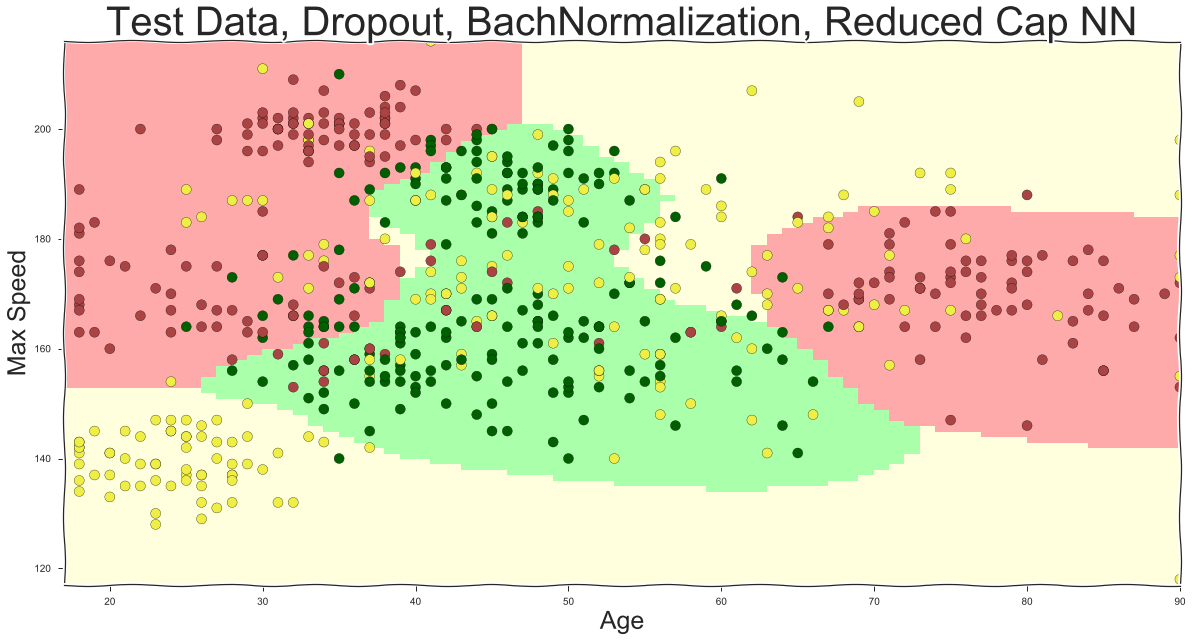

In [127]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Dropout, BachNormalization, Reduced Cap NN",
                fname='nn-reg-test.png')